# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Определим рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('real_estate_data.csv', sep='\t', decimal='.')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')

## Загрузка данных

### Первые строки таблицы

In [2]:
# Выведем первые десять строк таблицы
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Общие сведения о данных

In [3]:
# Выведем основные сведения о данных в таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В следующих столбцах необходимо привести тип данных в соответствие с содержащейся в них информацией:
- `first_day_exposition` (object перевести в datetime, т.к. столбец содержит даты);
- `floors_total` (float64 перевести в Int64, т.к. количество этажей - целое число);
- `is_apartment` (object перевести в bool, т.к. столбец содержит логические значения True/False);
- `balcony` (float64 перевести в Int64, т.к. количество балконов - целое число);
- `parks_around3000` (float64 перевести в Int64, т.к. количество парков - целое число);
- `ponds_around3000` (float64 перевести в Int64, т.к. количество водоёмов - целое число);
- `days_exposition` (float64 перевести в Int64, т.к. количество дней - целое число)

### Пропуски

In [4]:
# Выведем количество пропусков для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В большинстве столбцов имеются пропуски, в дальнейшем по каждому столбцу определим, как поступить с пропусками

## Предобработка данных
Изучим столбцы внимательнее, исправим данные, там, где это возможно.

### Количество фотографий в объявлении

In [5]:
# Создадим копию исходной таблицы, где будут аккумулироваться обработанные данные
good_data = data.copy()
# Выведем информацию о данных в столбце
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

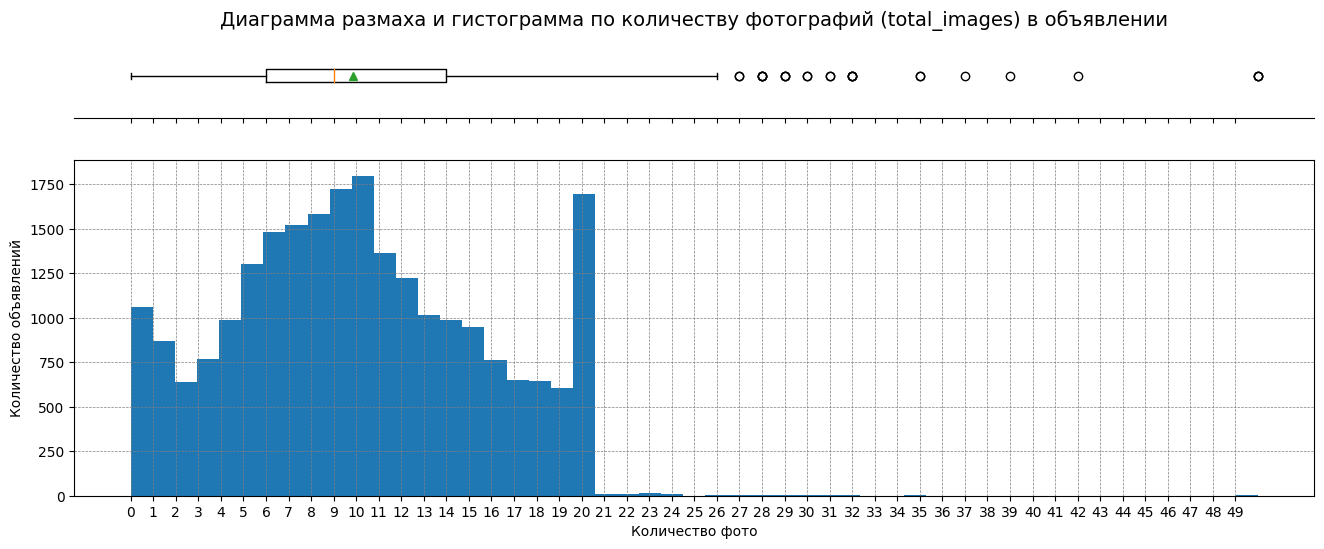

In [6]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(16, 6),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.2, .8)})
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[1].grid(color='gray', linewidth = 0.5, linestyle = '--') 
ax[1].set_xticks(range(0, 50, 1))
ax[0].set_title('Диаграмма размаха и гистограмма по количеству фотографий (total_images) в объявлении', fontsize=14)
ax[1].set_xlabel('Количество фото')
ax[1].set_ylabel('Количество объявлений')
# Построим сами диаграммы
ax[0].boxplot(data['total_images'], vert=False, showmeans=True)
ax[1].hist(data['total_images'], bins=51)
plt.show()

Не считая всплеска в распределении для значений 0, 1 и 20 фото, в объявлениях в среднем 9-10 фотографий. Распределение похоже на нормальное. Верхняя граница нормального размаха 26 фото, при этом видно, что объявлений с количеством фото более 21 практически не бывает. Не будем отбрасывать данные, т.к. реальные данные не будут лишними.

### Общая площадь

In [7]:
# Выведем информацию о данных в столбце
display(data['total_area'].describe())

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

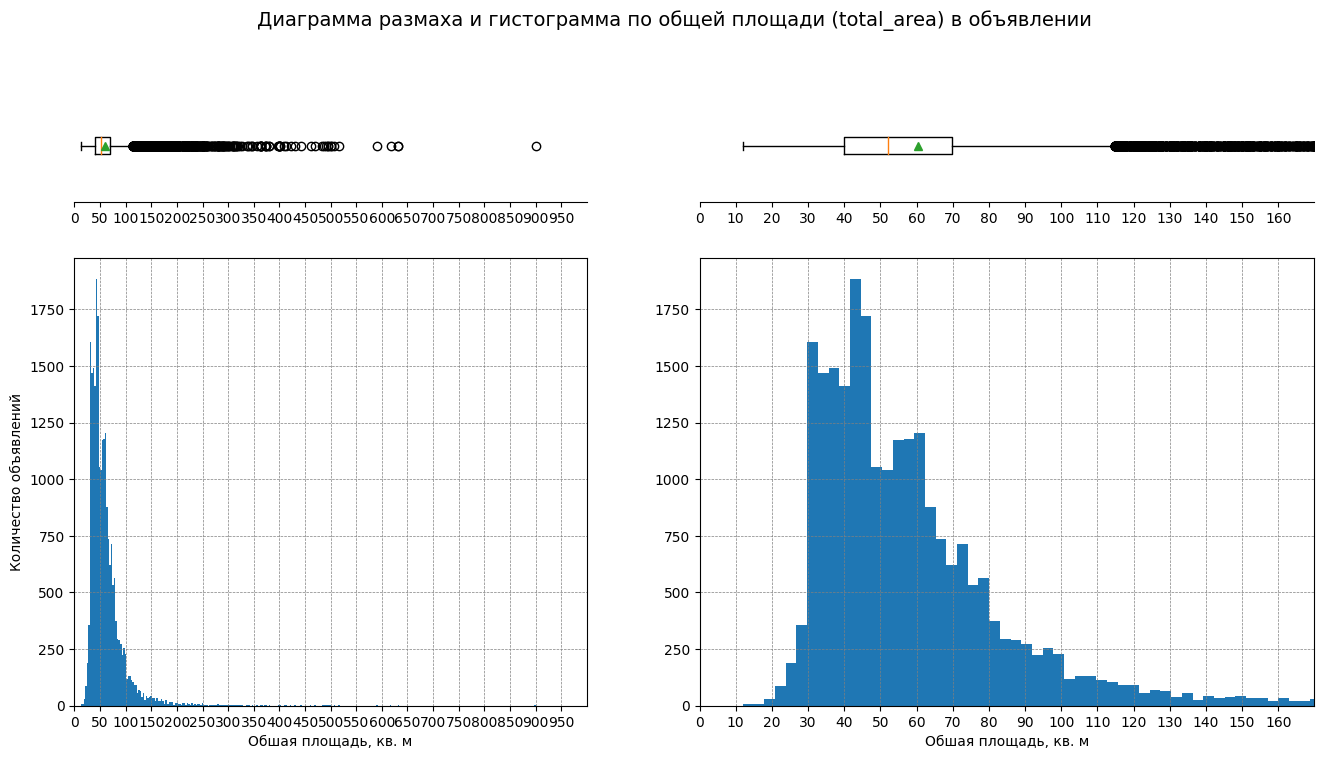

In [8]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Поскольку площадь в большинстве объявлений не превышает 70 кв. м, а максимальная площадь 900 кв. м,
# то построим диаграммы в разных масштабах:
# слева будут диаграммы на весь диапазон значений площади, а справа - с ограничением максимальной площади на уровне 160 кв. м.
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=2, nrows=2,
                       figsize=(16, 8),
                       sharex=False,
                       gridspec_kw={'height_ratios': (.2, .8)
                       , 'width_ratios': (.5, .6)})
fig.suptitle('Диаграмма размаха и гистограмма по общей площади (total_area) в объявлении', fontsize=14)
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].spines['left'].set_visible(False)
ax[0, 0].tick_params(axis='y', left=False, labelleft=False)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].spines['left'].set_visible(False)
ax[0, 1].tick_params(axis='y', left=False, labelleft=False)
ax[1, 0].grid(color='gray', linewidth = 0.5, linestyle = '--')
ax[1, 1].grid(color='gray', linewidth = 0.5, linestyle = '--')
ax[0,0].sharex(ax[1, 0])
ax[0,1].sharex(ax[1, 1])
ax[1, 0].set_xticks(range(0, 1000, 50))
ax[1, 0].set_xlim(0,1000)
ax[1, 1].set_xticks(range(0, 170, 10))
ax[1, 1].set_xlim(0,170)
#ax[0,0].set_title('Диаграмма размаха и гистограмма по общей площади (total_area) в объявлении', fontsize=14)
ax[1,0].set_xlabel('Обшая площадь, кв. м')
ax[1,0].set_ylabel('Количество объявлений')
ax[1,1].set_xlabel('Обшая площадь, кв. м')
# Построим сами диаграммы
ax[0,0].boxplot(data['total_area'], vert=False, showmeans=True)
ax[0,1].boxplot(data['total_area'], vert=False, showmeans=True)
ax[1,0].hist(data['total_area'], bins=300)
ax[1,1].hist(data['total_area'], bins=300)


plt.show()

Распределение похоже на нормальное, но вместо одного пика имеется несколько. Верхняя граница нормального размаха ~115 кв. м. Из-за выбросов среднее отличается от медианы. Для рассматриваемой выборки все объявления с общей площадью, превышающей 200 кв. м, выглядят аномальными.
   Удалим из таблицы такие объявления и посмотрим, какое количество объявлений и какую долю исходной таблицы исключили.

In [9]:
cleared_total_area = data.query('total_area <= 200')['total_area']
display(len(data)-cleared_total_area.count())
1-cleared_total_area.count()/len(data)

227

0.009578463226296519

Менее 1% от исходной выборки отброшено в рассматриваемом столбце. При этом отброшены только выбивающиеся, не характерные для выборки значения, поэтому качество данных не ухудшилось.

In [10]:
# Обновим результирующую таблицу
good_data = good_data[good_data.index.isin(cleared_total_area.index)]
1-len(good_data)/len(data)

0.009578463226296519

### Дата публикации

In [11]:
# Переведём данные столбца в тип datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
display(data['first_day_exposition'].min())
display(data['first_day_exposition'].max())
(data['first_day_exposition'].max()-data['first_day_exposition'].min())

Timestamp('2014-11-27 00:00:00')

Timestamp('2019-05-03 00:00:00')

Timedelta('1618 days 00:00:00')

Как видим, таблица содержит объявления за период ориентировочно 4,5 года

In [12]:
# Обновим результирующую таблицу
good_data['first_day_exposition'] = data['first_day_exposition']

### Цена на момент снятия объявления

In [13]:
# Избавимся от лишних нулей в значениях (будет стоимость не в рублях, а в млн руб)
cleared_last_price = data['last_price']/1000000

In [14]:
# Выведем информацию о данных в столбце
cleared_last_price.describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

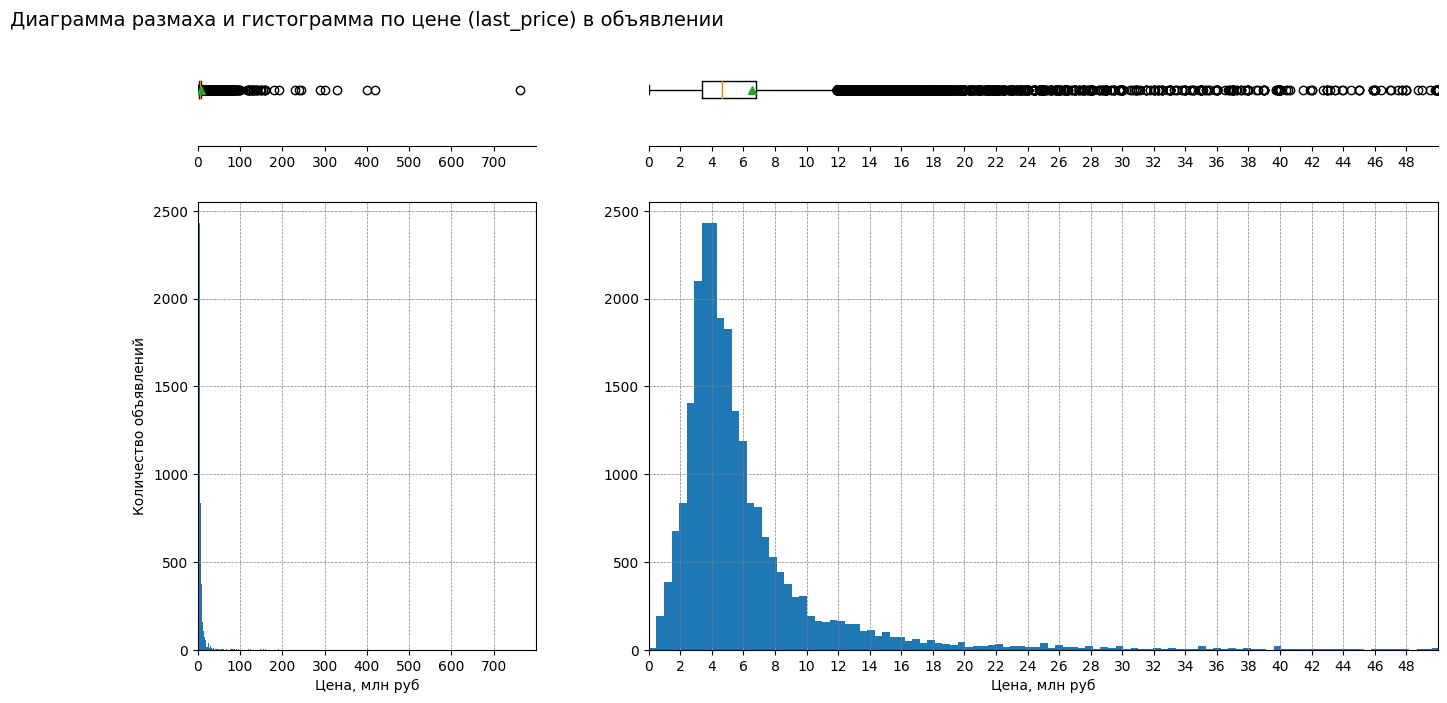

In [15]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Поскольку цена в большинстве объявлений не превышает 7 млн руб, а максимальная цена 763 млн руб,
# то построим диаграммы в разных масштабах:
# слева будут диаграммы на весь диапазон цены, а справа - с ограничением максимальной цены на уровне 50 млн руб.
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=2, nrows=2,
                       figsize=(16, 8),
                       sharex=False,
                       gridspec_kw={'height_ratios': (.2, .8), 'width_ratios': (.3, .7)})
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].spines['left'].set_visible(False)
ax[0, 0].tick_params(axis='y', left=False, labelleft=False)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].spines['left'].set_visible(False)
ax[0, 1].tick_params(axis='y', left=False, labelleft=False)
ax[1, 0].grid(color='gray', linewidth = 0.5, linestyle = '--')
ax[1, 1].grid(color='gray', linewidth = 0.5, linestyle = '--')
ax[0,0].sharex(ax[1, 0])
ax[0,1].sharex(ax[1, 1])
ax[1, 0].set_xticks(range(0, 800, 100))
ax[1, 0].set_xlim(0,800)
ax[1, 1].set_xticks(range(0, 50, 2))
ax[1, 1].set_xlim(0,50)
ax[0,0].set_title('Диаграмма размаха и гистограмма по цене (last_price) в объявлении', fontsize=14)
ax[1,0].set_xlabel('Цена, млн руб')
ax[1,0].set_ylabel('Количество объявлений')
ax[1,1].set_xlabel('Цена, млн руб')
# Построим сами диаграммы
ax[0,0].boxplot(cleared_last_price, vert=False, showmeans=True)
ax[0,1].boxplot(cleared_last_price, vert=False, showmeans=True)
ax[1,0].hist(cleared_last_price, bins=1600)
ax[1,1].hist(cleared_last_price, bins=1600)
plt.show()

Верхняя граница нормального размаха ~ 12 млн руб. Распределение похоже на нормальное. Из-за выбросов среднее существенно отличается от медианы. Для рассматриваемой выборки все объявления с ценой, превышающей 30 млн руб, выглядят аномальными. Удалим из таблицы такие объявления и посмотрим, какое количество объявлений и какую долю исходной таблицы исключили из рассмотрения.

In [16]:
cleared_last_price = cleared_last_price[cleared_last_price <= 30]
display(len(data)-cleared_last_price.count())
1-cleared_last_price.count()/len(data)

316

0.013333895944976581

Мы исключили ощутимые ~1,3% от исходных данных в рассматриваемом столбце, но благодаря исключению аномалий оставшиеся данные качественнее будут отражать закономерности, если таковые имеются.

In [17]:
# Обновим результирующую таблицу
good_data['last_price'] = cleared_last_price
good_data = good_data[good_data.index.isin(cleared_last_price.index)]
1-len(good_data)/len(data)

0.01734250390311831

### Число комнат

In [18]:
# Выведем информацию о данных в столбце
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

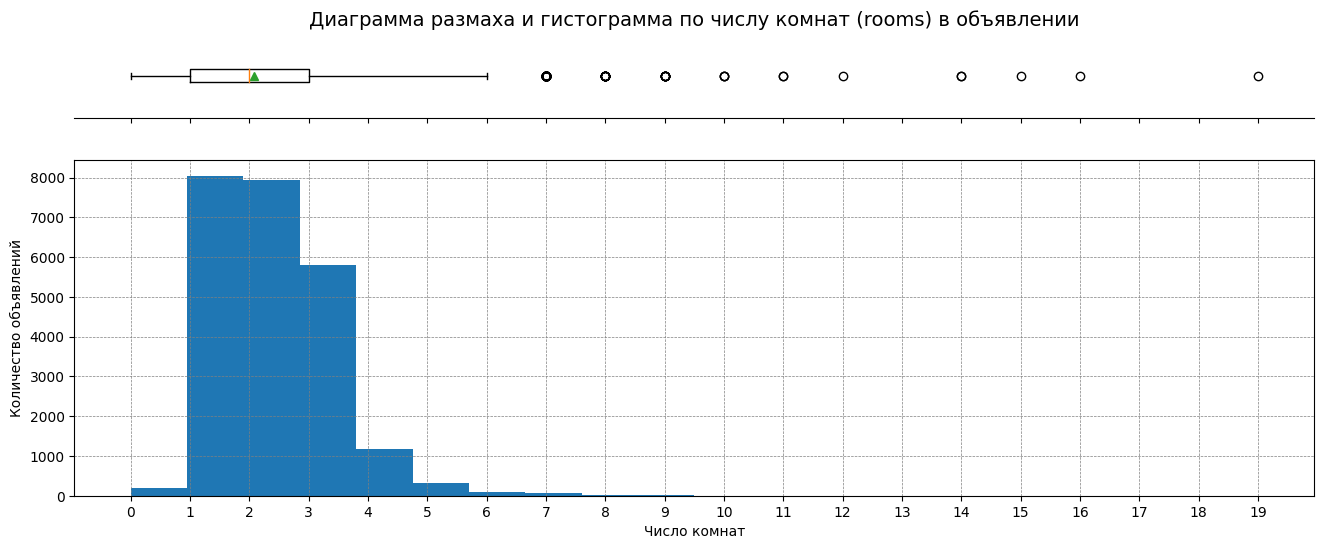

In [19]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(16, 6),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.2, .8)})
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[1].grid(color='gray', linewidth = 0.5, linestyle = '--') 
ax[1].set_xticks(range(0, 20, 1))
ax[0].set_title('Диаграмма размаха и гистограмма по числу комнат (rooms) в объявлении', fontsize=14)
ax[1].set_xlabel('Число комнат')
ax[1].set_ylabel('Количество объявлений')
# Построим сами диаграммы
ax[0].boxplot(data['rooms'], vert=False, showmeans=True)
ax[1].hist(data['rooms'], bins=20)
plt.show()

Больше всего представлено однокомнатных и двухкомнатных квартир. Верхняя граница нормального размаха 6 комнат, при этом видно, что объявлений с числом комнат более шести незначительное количество. Отбросим объявления с числом комнтат более 8, а также те объявления, где указано ноль комнат, и посмотрим, какое количество объявлений и какую долю от исходной таблицы исключили таким действием.

In [20]:
cleared_rooms = data.query('rooms <= 8 and rooms > 0')['rooms']
display(len(data)-cleared_rooms.count())
1-cleared_rooms.count()/len(data)

216

0.009114308620616907

Отброшено менее 1% от исходного количества объявлений в рассматриваемом столбце.

In [21]:
# Обновим результирующую таблицу
good_data = good_data[good_data.index.isin(cleared_rooms.index)]
1-len(good_data)/len(data)

0.025655090932106828

### Высота потолков

In [22]:
# Выведем информацию о данных в столбце
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

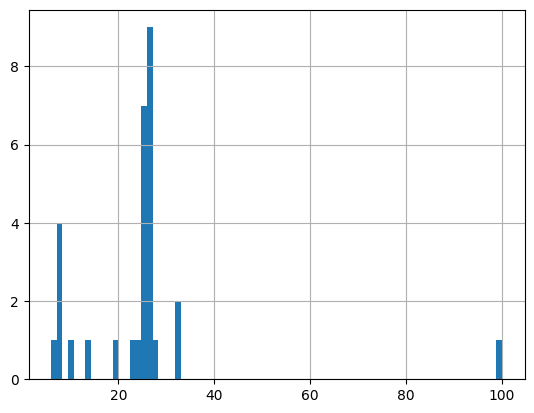

In [23]:
# Построим гистограмму для диапазона с подозрительными значениями более 60 м
data['ceiling_height'].hist(bins=80, range=(6,100))
plt.show()

Все значения более 20 м и менее 40 м заменим на величину в 10 раз меньше (вероятно, не поставлена запятая при заполнении высоты потолка).

In [24]:
cleared_ceiling_height = data.copy()
cleared_ceiling_height.loc[(cleared_ceiling_height['ceiling_height']>20) & \
                           (cleared_ceiling_height['ceiling_height']<40), 'ceiling_height'] = \
cleared_ceiling_height['ceiling_height']/10

Для заполнения пропущенных значений, которые могли быть не заполнены из-за того, что люди, например, не знают высоту потолка, рассчитаем медианную высоту потолка для домов различной этажности и подставим полученные значения вместо пустых значений в те объявления, в которых такое же количество этажей.

In [25]:
# Посмотрим количество домов с разным количеством этажей
cleared_ceiling_height.pivot_table(index='floors_total', values='last_price', aggfunc='count')

,last_price
floors_total,
1.0,25
2.0,383
3.0,668
4.0,1200
5.0,5788
6.0,914
7.0,592
8.0,390
9.0,3761


Для домов с количеством этажей более 28 будем брать медианное значение не для каждого значения числа этажей, а для всех объявлений с числом этажей более 28.

In [26]:
cleared_ceiling_height.loc[(cleared_ceiling_height['floors_total'] > 28) & \
                           (cleared_ceiling_height['ceiling_height'].isna()),'ceiling_height']= \
cleared_ceiling_height.loc[(cleared_ceiling_height['floors_total'] > 28) ,'ceiling_height'].median()

In [27]:
# Для тех строк, в которых не указана высота потолков и не указано число этажей в доме,
# заполним пропуски медианным значением высоты потолка по всей выборке.
# Проверим количество таких строк
cleared_ceiling_height.loc[(cleared_ceiling_height['floors_total'].isna()) & \
                           (cleared_ceiling_height['ceiling_height'].isna()),'floors_total'].isna().sum()

77

In [28]:
# Заполним пропуски
cleared_ceiling_height.loc[(cleared_ceiling_height['floors_total'].isna()) & \
                           (cleared_ceiling_height['ceiling_height'].isna()),'ceiling_height' ] = \
cleared_ceiling_height['ceiling_height'].median()

In [29]:
# Рассчитаем медианную высоту потолков для домов разной этажности и заполним пропуски в столбце с высотой потолков
for floors in cleared_ceiling_height[~(cleared_ceiling_height['floors_total'].isna()) & \
                                     (cleared_ceiling_height['floors_total'] <=28)]['floors_total'].unique():
    cleared_ceiling_height.loc[(cleared_ceiling_height['floors_total'] == floors) & \
                               (cleared_ceiling_height['ceiling_height'].isna()), 'ceiling_height'] = \
    cleared_ceiling_height.loc[(cleared_ceiling_height['floors_total'] == floors), 'ceiling_height'].median()
# Убедимся, что пропусков больше нет
cleared_ceiling_height['ceiling_height'].isna().sum()

0

In [30]:
# Очевидно, что высота потолков менее 2.4 м и более 3.5 м - это аномалии
# Исключим аномальные значения
cleared_ceiling_height = cleared_ceiling_height.query('not ceiling_height > 3.5 and not ceiling_height < 2.4')['ceiling_height']

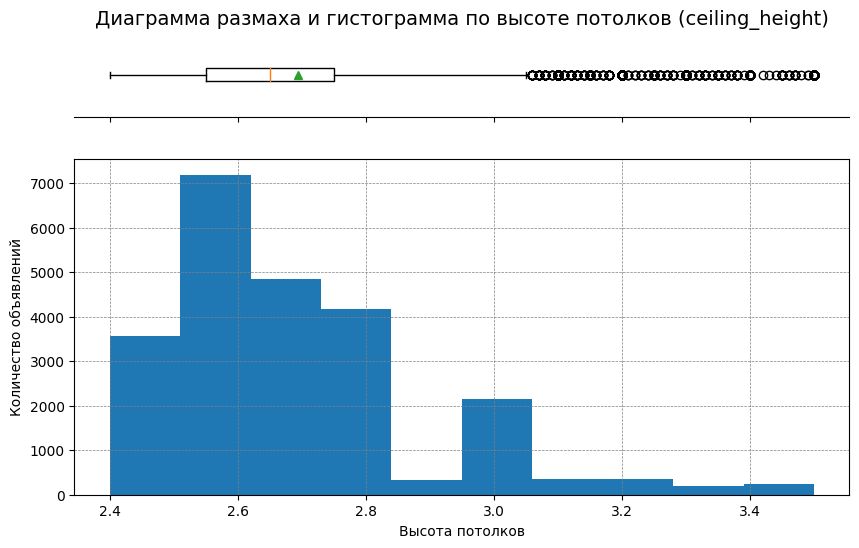

In [31]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(10, 6),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.2, .8)})
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[1].grid(color='gray', linewidth = 0.5, linestyle = '--') 
ax[0].set_title('Диаграмма размаха и гистограмма по высоте потолков (ceiling_height)', fontsize=14)
ax[1].set_xlabel('Высота потолков')
ax[1].set_ylabel('Количество объявлений')
# Построим сами диаграммы
ax[0].boxplot(cleared_ceiling_height, vert=False, showmeans=True)
ax[1].hist(cleared_ceiling_height, bins=10)
plt.show()

Больше всего представлено квартир с высотой потолков 2.5, есть также локальный пик для распределения для высоты 3 м. Верхняя граница нормального размаха 3,1 м. Отбрасывать дополнительно не будем, чтоб не обеднять данные. Посмотрим, какое количество объявлений и какую долю от исходной таблицы мы исключили после предобработки данных в столбце с высотой потолков.

In [32]:
display(len(data)-cleared_ceiling_height.count())
1-cleared_ceiling_height.count()/len(data)

305

0.01286974133929697

Избавились от менее, чем 1,3% исходных данных в рассматриваемом столбце, которые содержали аномальные значения

In [33]:
# Обновим результирующую таблицу
good_data['ceiling_height'] = cleared_ceiling_height
good_data = good_data[good_data.index.isin(cleared_ceiling_height.index)]
1-len(good_data)/len(data)

0.036035275750031626

### Этажей в доме

In [34]:
# Выведем информацию о данных в столбце
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

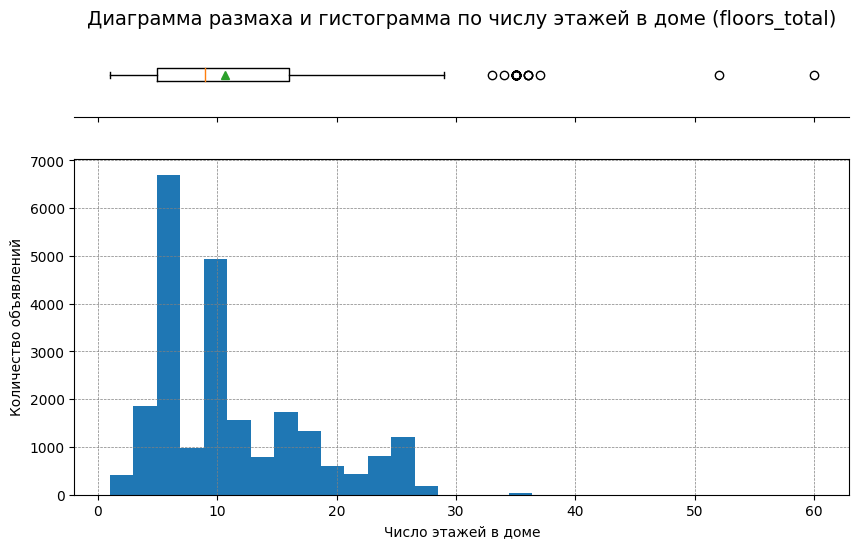

In [35]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(10, 6),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.2, .8)})
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[1].grid(color='gray', linewidth = 0.5, linestyle = '--') 
ax[0].set_title('Диаграмма размаха и гистограмма по числу этажей в доме (floors_total)', fontsize=14)
ax[1].set_xlabel('Число этажей в доме')
ax[1].set_ylabel('Количество объявлений')
# Построим сами диаграммы
ax[0].boxplot(data[data['floors_total'].isna() == False]['floors_total'], vert=False, showmeans=True)
ax[1].hist(data['floors_total'], bins=30)
plt.show()

Больше всего представлено квартир из пятиэтажек, десятиэтажек, есть также локальные пики в районе 16-18 и 25-26 этажей. Верхняя граница нормального размаха 30 этажей. Отбросим объявления с пропусками в данном столбце, после чего поменяем тип данных на int, и посмотрим, какое количество объявлений и какую долю от исходной таблицы мы исключили после предобработки данных в столбце с числом этажей в доме.

In [36]:
cleared_floors_total = data.query('not floors_total.isna()')['floors_total']
display(len(data)-cleared_floors_total.count())
1-cleared_floors_total.count()/len(data)

86

0.0036288450989493404

Исключено менее 0,4% от исходных данных по рассматриваемому столбцу.

In [37]:
# Обновим результирующую таблицу
good_data['floors_total'] = cleared_floors_total
good_data = good_data[good_data.index.isin(cleared_floors_total.index)]
cleared_floors_total = cleared_floors_total.astype('int')
1-len(good_data)/len(data)

0.03949533735600663

### Этаж

In [38]:
# Выведем информацию о данных в столбце
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

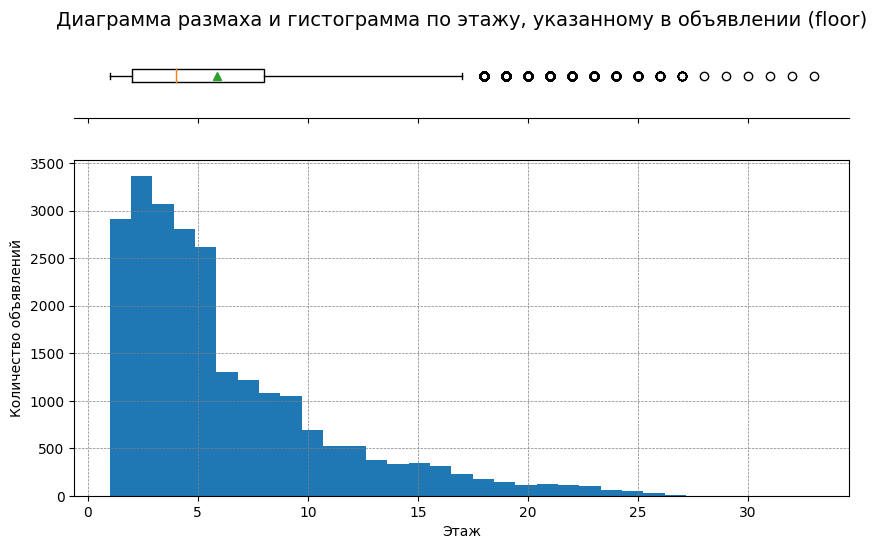

In [39]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(10, 6),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.2, .8)})
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[1].grid(color='gray', linewidth = 0.5, linestyle = '--') 
ax[0].set_title('Диаграмма размаха и гистограмма по этажу, указанному в объявлении (floor)', fontsize=14)
ax[1].set_xlabel('Этаж')
ax[1].set_ylabel('Количество объявлений')
# Построим сами диаграммы
ax[0].boxplot(data[(~data['floor'].isna())]['floor'], vert=False, showmeans=True)
ax[1].hist(data['floor'], bins=33)
plt.show()

Больше всего представлено квартир, расположенных до 6 этажа, следующая большая группа - с 6 по 10 этаж, следующая группа - с 11 по 16 этаж. Все объявления с квартирами на 17 этаже или выше - редкость. Оставим столбец без изменений.

### Жилая площадь

In [40]:
# Выведем информацию о данных в столбце
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

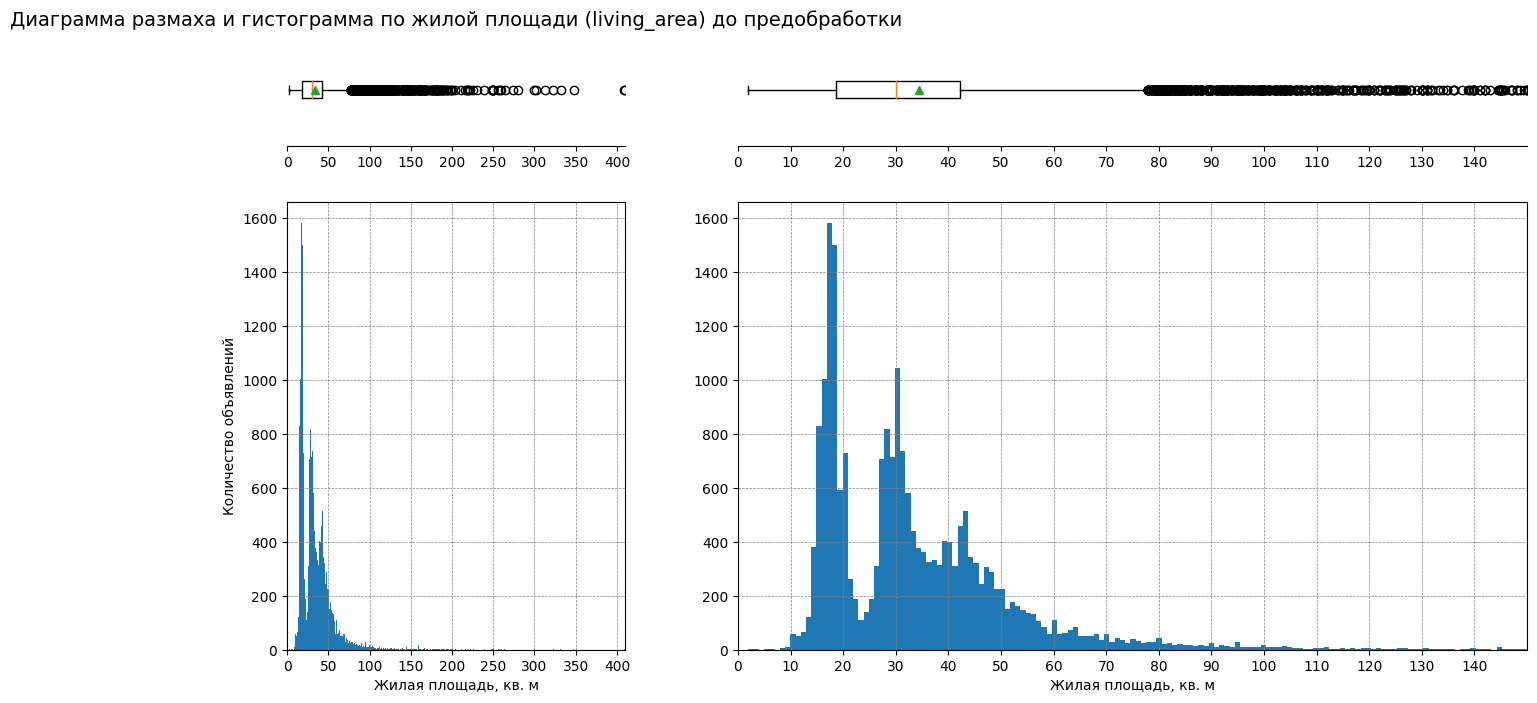

In [41]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Поскольку жилая площадь в большинстве объявлений не превышает 50 кв. м, а максимальная площадь составляет 410 кв. м,
# то построим диаграммы в разных масштабах:
# слева будут диаграммы на весь диапазон площадей, а справа - с ограничением максимальной площади на уровне 150 кв. м.
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=2, nrows=2,
                       figsize=(16, 8),
                       sharex=False,
                       gridspec_kw={'height_ratios': (.2, .8), 'width_ratios': (.3, .7)})
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].spines['left'].set_visible(False)
ax[0, 0].tick_params(axis='y', left=False, labelleft=False)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].spines['left'].set_visible(False)
ax[0, 1].tick_params(axis='y', left=False, labelleft=False)
ax[1, 0].grid(color='gray', linewidth = 0.5, linestyle = '--')
ax[1, 1].grid(color='gray', linewidth = 0.5, linestyle = '--')
ax[0,0].sharex(ax[1, 0])
ax[0,1].sharex(ax[1, 1])
ax[1, 0].set_xticks(range(0, 410, 50))
ax[1, 0].set_xlim(0,410)
ax[1, 1].set_xticks(range(0, 150, 10))
ax[1, 1].set_xlim(0,150)
ax[0,0].set_title('Диаграмма размаха и гистограмма по жилой площади (living_area) до предобработки', fontsize=14)
ax[1,0].set_xlabel('Жилая площадь, кв. м')
ax[1,0].set_ylabel('Количество объявлений')
ax[1,1].set_xlabel('Жилая площадь, кв. м')
# Построим сами диаграммы
ax[0,0].boxplot(data[~(data['living_area'].isna())]['living_area'], vert=False, showmeans=True)
ax[0,1].boxplot(data[~(data['living_area'].isna())]['living_area'], vert=False, showmeans=True)
ax[1,0].hist(data['living_area'], bins=410)
ax[1,1].hist(data['living_area'], bins=410)
plt.show()

Верхняя граница нормального размаха ~ 80 кв. м. Распределение имеет несколько пиков: 18-19 кв. м, 30 кв. м, 43 кв. м. Для рассматриваемой выборки все объявления с жилой площадью, превышающей 110 кв. м, а также менее 10 кв. м, выглядят аномальными. Удалим из таблицы такие объявления.

In [42]:
# Кроме аномальных значений площади при формировании среза учтём ранее выполненные срезы по
# количеству комнат и общей площади
cleared_living_area = data.query('((living_area <= 110 and living_area >= 10) or living_area.isna()) \
                                    and index in @cleared_rooms.index \
                                    and index in @cleared_total_area.index')

In [43]:
cleared_living_area['rooms'].unique()

array([3, 1, 2, 4, 5, 6, 7, 8], dtype=int64)

In [44]:
# Чтобы заполнить пропуски, вычислим медианные значения жилой площади для квартир с разным количеством комнат
# и запишем вместо пустых значений
for rooms in cleared_living_area['rooms'].unique():
    cleared_living_area.loc[(cleared_living_area['rooms'] == rooms) & \
                            (cleared_living_area['living_area'].isna()), 'living_area'] = \
    cleared_living_area.loc[(cleared_living_area['rooms'] == rooms), 'living_area'].median()
cleared_living_area = cleared_living_area['living_area']
# Убедимся, что пропусков больше нет
cleared_living_area.isna().sum()

0

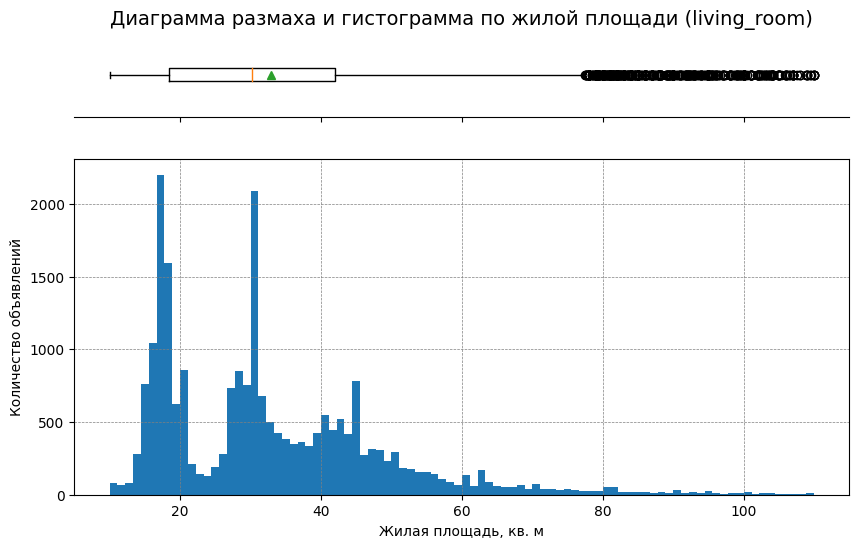

In [45]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(10, 6),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.2, .8)})
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[1].grid(color='gray', linewidth = 0.5, linestyle = '--') 
ax[0].set_title('Диаграмма размаха и гистограмма по жилой площади (living_room)', fontsize=14)
ax[1].set_xlabel('Жилая площадь, кв. м')
ax[1].set_ylabel('Количество объявлений')
# Построим сами диаграммы
ax[0].boxplot(cleared_living_area, vert=False, showmeans=True)
ax[1].hist(cleared_living_area, bins=90)
plt.show()

In [46]:
# Посмотрим, какое количество объявлений отброшено после предобработки данных в столбце с жилой площадью
display(len(data)-cleared_living_area.count())
1-cleared_living_area.count()/len(data)

542

0.02287016329802949

Распределение после устранения пропусков в рассматриваемом столбце похоже на исходное, количество строк отброшено менее 2,3%.

In [47]:
# Обновим результирующую таблицу
good_data['living_area'] = cleared_living_area
good_data = good_data[good_data.index.isin(cleared_living_area.index)]
1-len(good_data)/len(data)

0.04346174944090464

### Площадь кухни

In [48]:
# Выведем информацию о данных в столбце
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

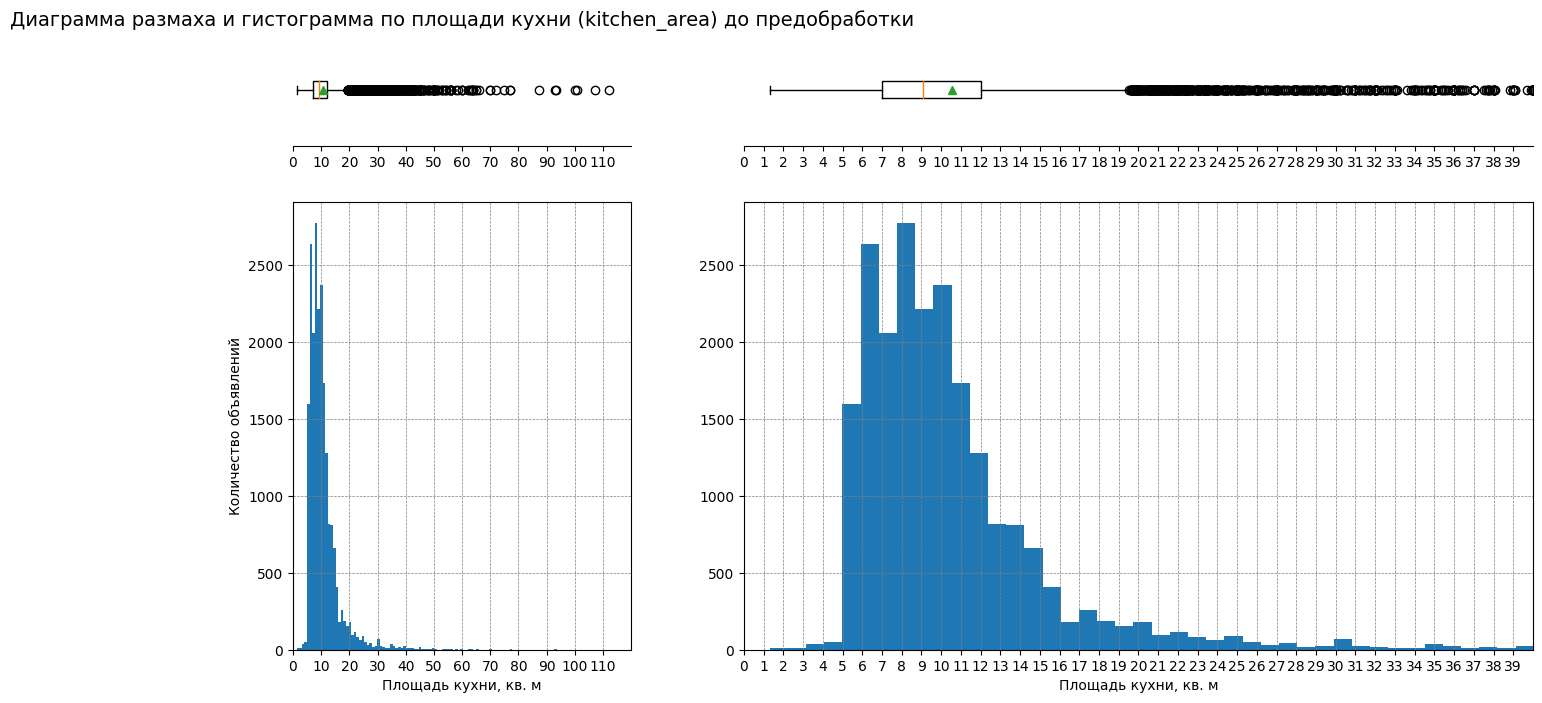

In [49]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Поскольку площадь кухни в большинстве объявлений не превышает 15 кв. м, а максимальная площадь кухни 112 кв. м,
# то построим диаграммы в разных масштабах:
# слева будут диаграммы на весь диапазон площадей, а справа - с ограничением максимальной площади на уровне 40 кв.м.
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=2, nrows=2,
                       figsize=(16, 8),
                       sharex=False,
                       gridspec_kw={'height_ratios': (.2, .8), 'width_ratios': (.3, .7)})
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].spines['left'].set_visible(False)
ax[0, 0].tick_params(axis='y', left=False, labelleft=False)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].spines['left'].set_visible(False)
ax[0, 1].tick_params(axis='y', left=False, labelleft=False)
ax[1, 0].grid(color='gray', linewidth = 0.5, linestyle = '--')
ax[1, 1].grid(color='gray', linewidth = 0.5, linestyle = '--')
ax[0,0].sharex(ax[1, 0])
ax[0,1].sharex(ax[1, 1])
ax[1, 0].set_xticks(range(0, 120, 10))
ax[1, 0].set_xlim(0,120)
ax[1, 1].set_xticks(range(0, 40, 1))
ax[1, 1].set_xlim(0,40)
ax[0,0].set_title('Диаграмма размаха и гистограмма по площади кухни (kitchen_area) до предобработки', fontsize=14)
ax[1,0].set_xlabel('Площадь кухни, кв. м')
ax[1,0].set_ylabel('Количество объявлений')
ax[1,1].set_xlabel('Площадь кухни, кв. м')
# Построим сами диаграммы
ax[0,0].boxplot(data[~(data['kitchen_area'].isna())]['kitchen_area'], vert=False, showmeans=True)
ax[0,1].boxplot(data[~(data['kitchen_area'].isna())]['kitchen_area'], vert=False, showmeans=True)
ax[1,0].hist(data['kitchen_area'], bins=120)
ax[1,1].hist(data['kitchen_area'], bins=120)
plt.show()

Верхняя граница нормального размаха ~ 19.5 кв. м. Пик распределения приходится на диапазон 6-10 кв. м. Для рассматриваемой выборки все объявления с площадью кухни, превышающей 30 кв. м, а также менее 4 кв. м, выглядят аномальными. Удалим из таблицы такие объявления.

In [50]:
# Кроме аномальных значений площади кухни при формировании среза учтём
# ранее выполненный срез по жилой площади
cleared_kitchen_area = data.query('((kitchen_area <= 30 and kitchen_area >= 4) or kitchen_area.isna()) \
                                    and index in @cleared_living_area.index')

In [51]:
# Чтобы заполнить пропуски, вычислим медианные значения площади кухни для квартир с разным количеством комнат
# и запишем вместо пустых значений
for rooms in cleared_kitchen_area['rooms'].unique():
    cleared_kitchen_area.loc[(cleared_kitchen_area['rooms'] == rooms) & \
                            (cleared_kitchen_area['kitchen_area'].isna()), 'kitchen_area'] = \
    cleared_kitchen_area.loc[(cleared_kitchen_area['rooms'] == rooms), 'kitchen_area'].median()
cleared_kitchen_area = cleared_kitchen_area['kitchen_area']
# Убедимся, что пропусков больше нет
cleared_kitchen_area.isna().sum()

0

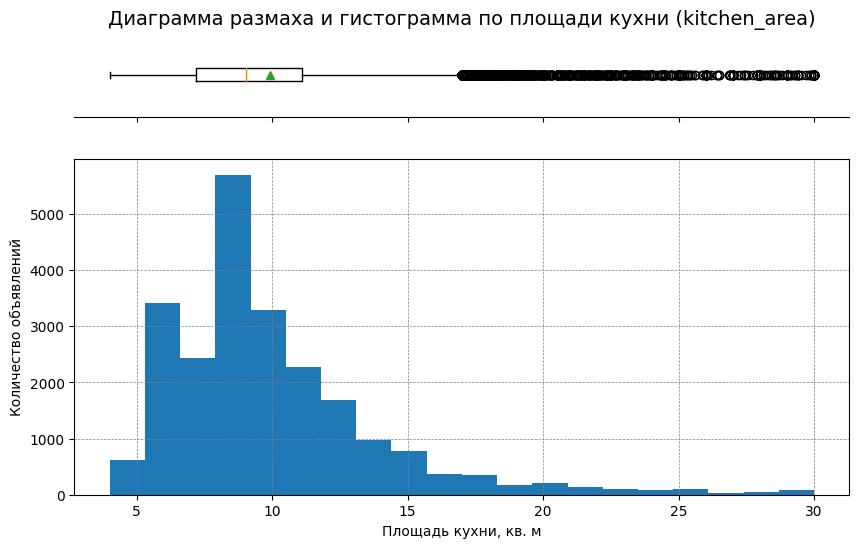

In [52]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(10, 6),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.2, .8)})
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[1].grid(color='gray', linewidth = 0.5, linestyle = '--') 
ax[0].set_title('Диаграмма размаха и гистограмма по площади кухни (kitchen_area)', fontsize=14)
ax[1].set_xlabel('Площадь кухни, кв. м')
ax[1].set_ylabel('Количество объявлений')
# Построим сами диаграммы
ax[0].boxplot(cleared_kitchen_area, vert=False, showmeans=True)
ax[1].hist(cleared_kitchen_area, bins=20)
plt.show()

In [53]:
# Посмотрим, какое количество объявлений отброшено после предобработки данных в столбце с жилой площадью
display(len(data)-cleared_kitchen_area.count())
1-cleared_kitchen_area.count()/len(data)

819

0.03455842018650579

Распределение после устранения пропусков в рассматриваемом столбце похоже на исходное, количество строк отброшено менее 3,5%.

In [54]:
# Обновим результирующую таблицу
good_data['kitchen_area'] = cleared_kitchen_area
good_data = good_data[good_data.index.isin(cleared_kitchen_area.index)]
1-len(good_data)/len(data)

0.053251192033419104

### Число балконов

In [55]:
# Выведем информацию о данных в столбце
data['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [56]:
# Посмотрим на значения в столбце
data['balcony'].value_counts()

balcony
1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: count, dtype: int64

Пропущенные значения заполним нулями (если количество не указано, то, вероятно, балкона нет). Тип данных приведём к int.

In [57]:
cleared_balcony = data['balcony'].fillna(0)
cleared_balcony = cleared_balcony.astype('int')

In [58]:
# Обновим результирующую таблицу
good_data['balcony'] = cleared_balcony
good_data = good_data[good_data.index.isin(cleared_balcony.index)]
1-len(good_data)/len(data)

0.053251192033419104

### Квартира-студия

In [59]:
# Выведем информацию о данных в столбце
data['studio'].value_counts()

studio
False    23550
True       149
Name: count, dtype: int64

Как видим, подавляющее большинство квартир - не студии.

### Свободная планировка

In [60]:
# Выведем информацию о данных в столбце
data['open_plan'].value_counts()

open_plan
False    23632
True        67
Name: count, dtype: int64

Как видим, лишь незначительная часть квартир в рассматриваемой таблице имеют свободную планировку.

### Аппартаменты

In [61]:
# Выведем информацию о данных в столбце
data['is_apartment'].value_counts()

is_apartment
False    2725
True       50
Name: count, dtype: int64

Как видим, лишь незначительная часть квартир в рассматриваемой таблице являются аппартаментами. Аппартаменты - нежилые помещения, относятся к коммерческой недвижимости. Логично предположить, что все объявления, где данный столбец не заполнен, должно быть значение False.

In [62]:
# Заполним пропуски и поменяем тип данных на bool
cleared_is_apartment = data['is_apartment'].fillna(False)
cleared_is_apartment = cleared_is_apartment.astype('bool')

In [63]:
# Обновим результирующую таблицу
good_data['is_apartment'] = cleared_is_apartment
1-len(good_data)/len(data)

0.053251192033419104

### Название населённого пункта

In [64]:
# Выведем информацию о данных в столбце
data['locality_name'].value_counts()

locality_name
Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: count, Length: 364, dtype: int64

Всего 364 наименования. Необходимо проанализировать столбец на наличие дубликатов и устранить их

In [65]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [66]:
# Заменим выявленные явные дубликаты (и в исходной таблице тоже) и отбросим 49 строк с пропусками
names_to_replace = ['поселок Аннино', 'городской поселок Большая Ижора', 'поселок Бугры',
                    'поселок станции Вещево', 'поселок Возрождение', 'поселок городского типа Вырица',
                   'поселок Гаврилово', 'поселок Гарболово', 'поселок Жилгородок', 'деревня Зимитицы',
                   'поселок Ильичёво', 'поселок городского типа имени Свердлова', 'поселок Калитино',
                   'поселок Кобралово', 'поселок Коробицыно', 'поселок городского типа Красный Бор',
                   'поселок городского типа Лебяжье', 'городской посёлок Лесогорский', 'поселок Лисий Нос',
                    'городской посёлок Мга', 'поселок Мельниково', 'поселок Мичуринское', 'поселок Мурино',
                    'городской посёлок Назия', 'поселок Новый Свет', 'городской посёлок Павлово',
                    'поселок Пансионат Зелёный Бор', 'поселок Перово', 'поселок Петровское', 'поселок Победа',
                    'поселок Поляны', 'поселок станции Приветнинское', 'поселок Рабитицы', 'городской посёлок Рощино',
                    'поселок городского типа Рощино', 'поселок городского типа Рябово', 'поселок Рябово',
                    'городской посёлок Советский', 'поселок Старая Малукса', 'поселок Стеклянный', 'поселок Сумино',
                    'поселок Тельмана', 'поселок Терволово', 'поселок городского типа Токсово', 'поселок Усть-Луга',
                   'поселок городского типа Форносово', 'деревня Щеглово', 'городской поселок Янино-1',
                    'городской посёлок Янино-1']
correct_names = ['посёлок Аннино', 'поселок городского типа Большая Ижора', 'посёлок Бугры',
                 'посёлок при железнодорожной станции Вещево', 'посёлок Возрождение', 'посёлок городского типа Вырица',
                'поселок Гаврилово', 'деревня Гарболово', 'посёлок Жилгородок', 'посёлок Зимитицы',
                'посёлок Ильичёво', 'посёлок городского типа имени Свердлова', 'деревня Калитино',
                'посёлок Кобралово', 'посёлок Коробицыно', 'посёлок городского типа Красный Бор',
                'посёлок городского типа Лебяжье', 'поселок городского типа Лесогорский', 'посёлок Лисий Нос',
                 'посёлок городского типа Мга', 'посёлок Мельниково', 'посёлок Мичуринское', 'посёлок Мурино',
                 'поселок городского типа Назия', 'посёлок Новый Свет', 'посёлок городского типа Павлово',
                 'посёлок Пансионат Зелёный Бор', 'посёлок Перово', 'посёлок Петровское', 'посёлок Победа',
                 'посёлок Поляны', 'посёлок при железнодорожной станции Приветнинское', 'деревня Рабитицы',
                 'посёлок городского типа Рощино', 'посёлок городского типа Рощино', 'посёлок городского типа Рябово',
                'посёлок городского типа Рябово', 'поселок городского типа Советский', 'посёлок Старая Малукса',
                'посёлок Стеклянный', 'посёлок Сумино', 'посёлок Тельмана', 'посёлок Терволово',
                 'посёлок городского типа Токсово', 'посёлок Усть-Луга', 'посёлок городского типа Форносово',
                 'посёлок Щеглово', 'посёлок городского типа Янино-1', 'посёлок городского типа Янино-1']
cleared_locality_name = data[~(data['locality_name'].isna())]['locality_name']
for i in range(len(names_to_replace)):
    data['locality_name'] = data['locality_name'].replace(names_to_replace[i], correct_names[i])
    cleared_locality_name = cleared_locality_name.replace(names_to_replace[i], correct_names[i])

Устранили около 50 неявных дубликатов. Необходимо наименование населённых пунктов в форме заполнения объявления сделать в виде списка на выбор, чтоб нельзя было вводить эту информацию вручную

In [67]:
# Обновим результирующую таблицу
good_data['locality_name'] = cleared_locality_name
good_data = good_data[good_data.index.isin(cleared_locality_name.index)]
1-len(good_data)/len(data)

0.05515000632938094

### Расстояние до ближайшего аэропорта

In [68]:
# Выведем информацию о данных в столбце
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Там, где это возможно, пропуски заполним медианным расстоянием до аэропорта, указанным в объявлениях из того же населённого пункта. 

In [69]:
# Заполним вычисленными медианными значениями пропуски в столбце с расстоянием до аэропорта
cleared_airports_nearest = data.copy()
cleared_airports_nearest['airports_nearest'] = cleared_airports_nearest['airports_nearest']. \
                fillna(cleared_airports_nearest.groupby('locality_name')['airports_nearest'].transform('median'))
cleared_airports_nearest = cleared_airports_nearest['airports_nearest']

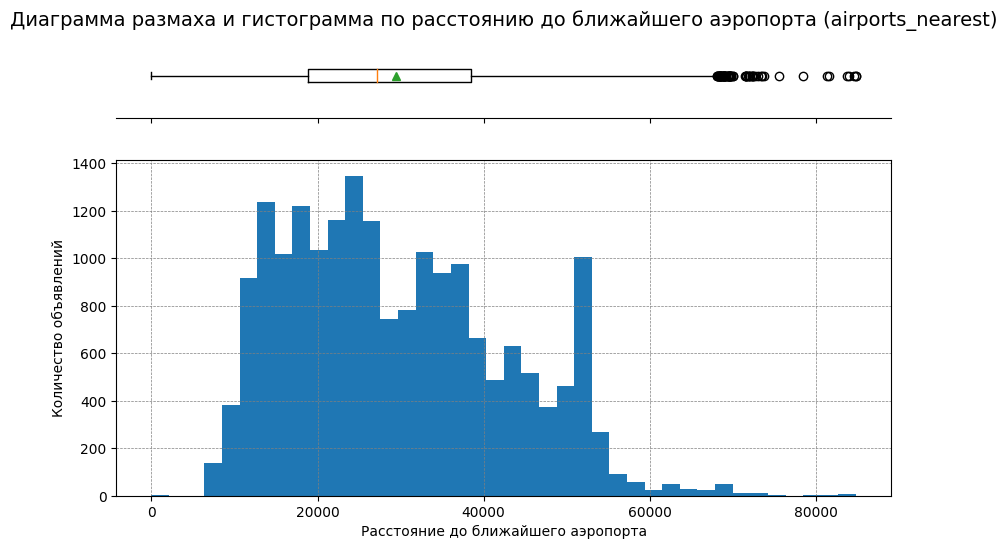

In [70]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(10, 6),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.2, .8)})
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[1].grid(color='gray', linewidth = 0.5, linestyle = '--') 
ax[0].set_title('Диаграмма размаха и гистограмма по расстоянию до ближайшего аэропорта (airports_nearest)', fontsize=14)
ax[1].set_xlabel('Расстояние до ближайшего аэропорта')
ax[1].set_ylabel('Количество объявлений')
# Построим сами диаграммы
ax[0].boxplot(cleared_airports_nearest[~cleared_airports_nearest.isna()], vert=False, showmeans=True)
ax[1].hist(cleared_airports_nearest, bins=40)
plt.show()

Верхняя граница нормального размаха ~ 70 км. Распределение имеет несколько пиков, вероятно, крупные населённые пункты расположены на расстоянии, соответствующем данным пикам. Для рассматриваемой выборки все объявления с расстоянием более  80 км выглядят аномальными. Удалим из таблицы такие объявления.

In [71]:
# Удалим аномальные значения
cleared_airports_nearest = cleared_airports_nearest[cleared_airports_nearest<=80000]

In [72]:
# Обновим результирующую таблицу
good_data['airports_nearest'] = cleared_airports_nearest
1-len(good_data)/len(data)

0.05515000632938094

### Расстояние до центра города

In [73]:
# Выведем информацию о данных в столбце
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Не все населённые пункты - города. Поэтому наличие пропусков неизбежно. 

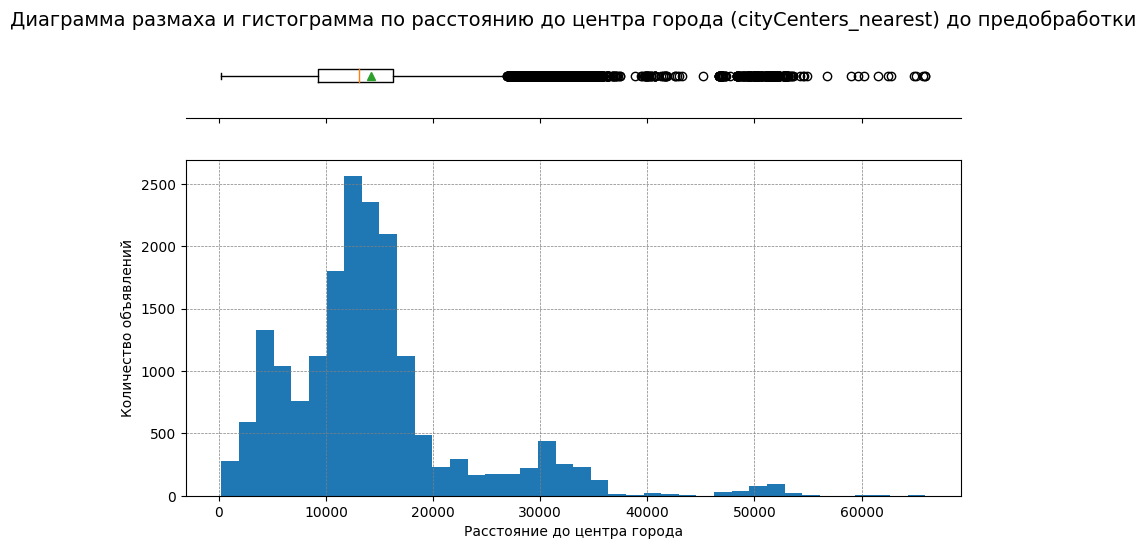

In [74]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(10, 6),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.2, .8)})
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[1].grid(color='gray', linewidth = 0.5, linestyle = '--') 
ax[0].set_title('Диаграмма размаха и гистограмма по расстоянию до центра города (cityCenters_nearest) до предобработки', fontsize=14)
ax[1].set_xlabel('Расстояние до центра города')
ax[1].set_ylabel('Количество объявлений')
# Построим сами диаграммы
ax[0].boxplot(data[~(data['cityCenters_nearest'].isna())]['cityCenters_nearest'], vert=False, showmeans=True)
ax[1].hist(data['cityCenters_nearest'], bins=40)
plt.show()

Верхняя граница нормального размаха ~ 28 км. Распределение имеет несколько пиков. Размеры Санкт-Петербурга в разных направлениях от 50 до 90 км, поэтому значения более 20 км более редкие. 

In [75]:
# Посмотрим как распределены значения по населённым пунктам
data[~(data['cityCenters_nearest'].isna())].groupby(by='locality_name')['cityCenters_nearest'].agg(['count', 'median'])

,count,median
locality_name,,
Зеленогорск,24,53381.0
Колпино,337,32018.0
Красное Село,176,29140.5
Кронштадт,95,49575.0
Ломоносов,132,51677.0
Павловск,38,32683.0
Петергоф,201,33771.0
Пушкин,368,27930.5
Санкт-Петербург,15660,12244.5


Очевидно, что расстояние во всех населённых пунктах, кроме Санкт-Петербурга, указано не до своего центра, а до Санкт-Петербурга. Поэтому не будет большой ошибкой заменить пропуски для всех населённых пунктов, кроме Санкт-Петербурга, медианным значением расстояния до Санкт-Петербурга по объявлениям из того же населённого пункта.

In [76]:
# Определим населённые пункты, для которых можно посчитать медианнуое расстояние до аэропорта
distances_to_center = data[~(data['cityCenters_nearest'].isna())]. \
                           groupby(by='locality_name')['cityCenters_nearest'].agg(['count', 'median'])
distances_to_center.columns = ['count', 'median']

In [77]:
# Заполним вычисленными медианными значениями пропуски в столбце с расстоянием до центра
cleared_cityCenters_nearest = data.copy()
for t in distances_to_center.index:
    cleared_cityCenters_nearest.loc[(cleared_cityCenters_nearest['locality_name'] == t) & \
                                 (cleared_cityCenters_nearest['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    cleared_cityCenters_nearest.loc[(cleared_cityCenters_nearest['locality_name'] == t) , 'cityCenters_nearest'].median()
cleared_cityCenters_nearest = cleared_cityCenters_nearest['cityCenters_nearest']

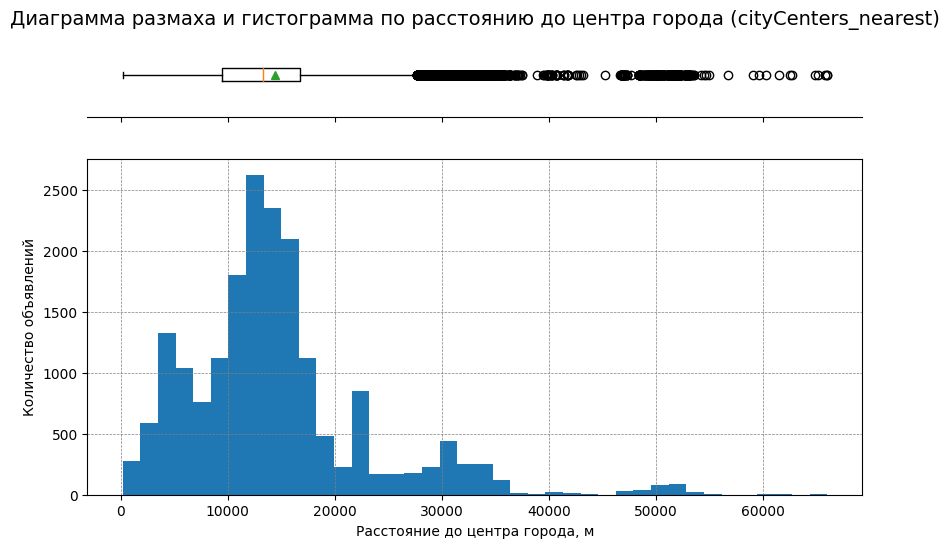

In [78]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(10, 6),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.2, .8)})
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[1].grid(color='gray', linewidth = 0.5, linestyle = '--') 
ax[0].set_title('Диаграмма размаха и гистограмма по расстоянию до центра города (cityCenters_nearest)', fontsize=14)
ax[1].set_xlabel('Расстояние до центра города, м')
ax[1].set_ylabel('Количество объявлений')
# Построим сами диаграммы
ax[0].boxplot(cleared_cityCenters_nearest[~cleared_cityCenters_nearest.isna()], vert=False, showmeans=True)
ax[1].hist(cleared_cityCenters_nearest, bins=40)
plt.show()

После заполнения пропусков характер распределения не изменился

In [79]:
# Обновим результирующую таблицу
good_data['cityCenters_nearest'] = cleared_cityCenters_nearest
1-len(good_data)/len(data)

0.05515000632938094

### Расстояние до ближайшего парка

In [80]:
# Выведем информацию о данных в столбце
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Не во всех населённых пунктах есть парки. Поэтому наличие пропусков неизбежно. 

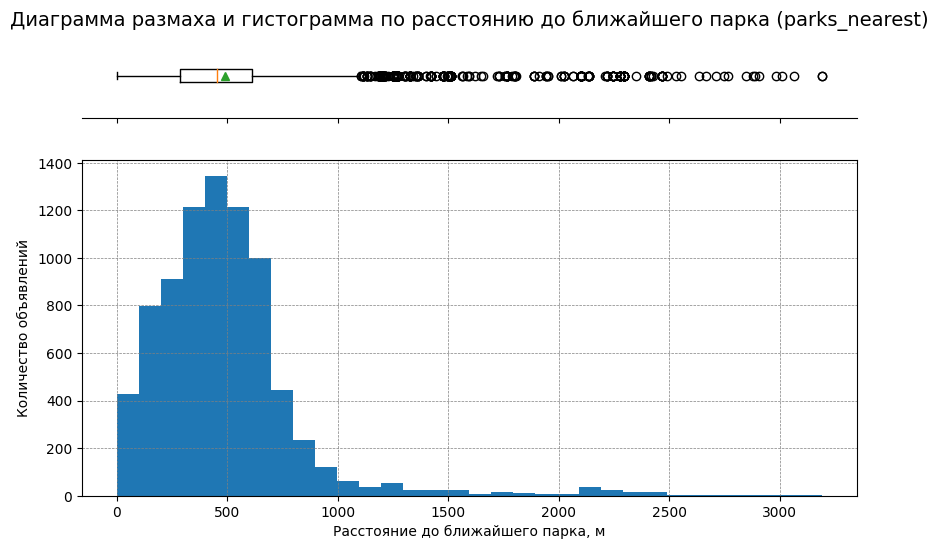

In [81]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(10, 6),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.2, .8)})
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[1].grid(color='gray', linewidth = 0.5, linestyle = '--') 
ax[0].set_title('Диаграмма размаха и гистограмма по расстоянию до ближайшего парка (parks_nearest)', fontsize=14)
ax[1].set_xlabel('Расстояние до ближайшего парка, м')
ax[1].set_ylabel('Количество объявлений')
# Построим сами диаграммы
ax[0].boxplot(data[~(data['parks_nearest'].isna())]['parks_nearest'], vert=False, showmeans=True)
ax[1].hist(data['parks_nearest'], bins=32)
plt.show()

Верхняя граница нормального размаха ~ 1,2 км. Значения более 1,2 км встречаются редко. Для объявлений, расположенных далеко от парка, такой параметр не всегда заполнялся, вероятно, поэтому имеются пропуски. Вносить изменения и удалять из данного столбца ничего не будем.

### Число парков в радиусе 3 км

In [82]:
# Выведем информацию о данных в столбце
data['parks_around3000'].value_counts()

parks_around3000
0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: count, dtype: int64

Не у всех объектов недвижимости имеются парки в радиусе 3 км. Наличие пропусков неизбежно. Для тех строк, где значение пропущено, заполним пропуски нулями, т.к. пропуск, вероятно, означает отсутствие парка в радиусе 3 км.

In [83]:
#Заполним пропуски и заменим тип на int
good_data['parks_around3000'] = data['parks_around3000'].fillna(0)
good_data['parks_around3000'] = good_data['parks_around3000'].astype('int')

### Расстояние до ближайшего водоёма

In [84]:
# Выведем информацию о данных в столбце
data['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

Не во всех населённых пунктах есть водоёмы поблизости. Поэтому наличие пропусков неизбежно.

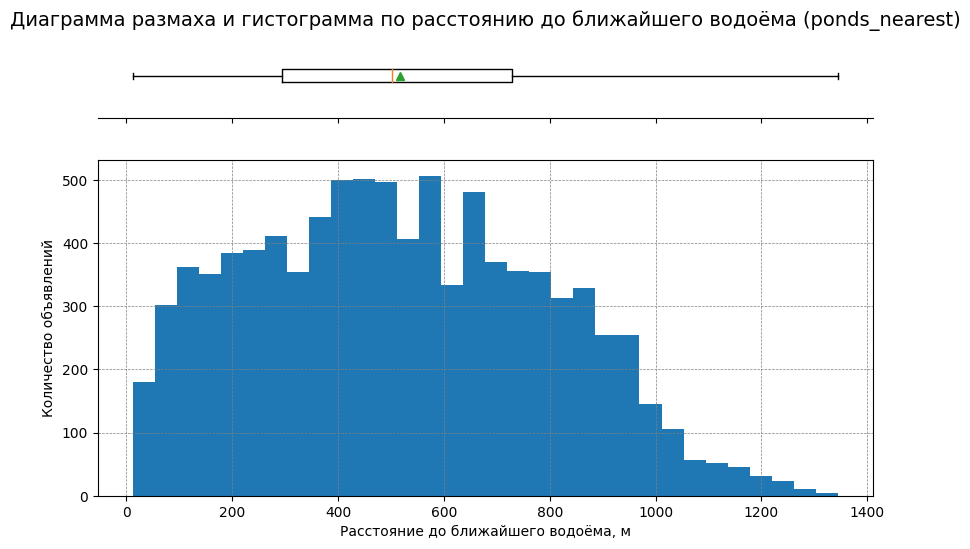

In [85]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(10, 6),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.2, .8)})
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[1].grid(color='gray', linewidth = 0.5, linestyle = '--') 
ax[0].set_title('Диаграмма размаха и гистограмма по расстоянию до ближайшего водоёма (ponds_nearest)', fontsize=14)
ax[1].set_xlabel('Расстояние до ближайшего водоёма, м')
ax[1].set_ylabel('Количество объявлений')
# Построим сами диаграммы
ax[0].boxplot(data[~(data['ponds_nearest'].isna())]['ponds_nearest'], vert=False, showmeans=True)
ax[1].hist(data['ponds_nearest'], bins=32)
plt.show()

Выбросов не наблюдается. Пропуски связаны, вероятно, с тем, что не везде имеется водоём поблизости. В данном столбце ничего изменять не будем.

### Число водоёмов в радиусе 3 км

In [86]:
# Выведем информацию о данных в столбце
data['ponds_around3000'].value_counts()

ponds_around3000
0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: count, dtype: int64

Не у всех объектов недвижимости имеются водоёмы в радиусе 3 км. Наличие пропусков неизбежно. Для тех строк, где значение пропущено, заполним пропуски нулями, т.к. пропуск, вероятно, означает отсутствие водоёма в радиусе 3 км.

In [87]:
# Заполним пропуски и заменим тип на int
good_data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
good_data['ponds_around3000'] = good_data['ponds_around3000'].astype('int')

### Дней от публикации до снятия

In [88]:
# Выведем информацию о данных в столбце
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

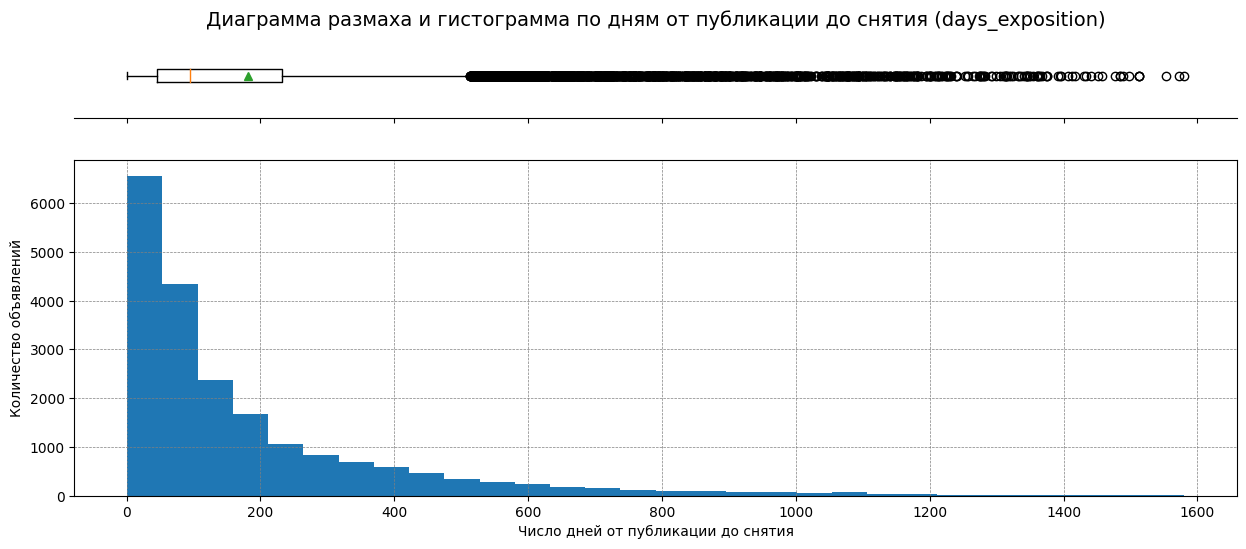

In [89]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(15, 6),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.2, .8)})
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[1].grid(color='gray', linewidth = 0.5, linestyle = '--') 
ax[0].set_title('Диаграмма размаха и гистограмма по дням от публикации до снятия (days_exposition)', fontsize=14)
#ax[1].set_xticks(range(0,1000,50))
ax[1].set_xlabel('Число дней от публикации до снятия')
ax[1].set_ylabel('Количество объявлений')
# Построим сами диаграммы
ax[0].boxplot(data[~(data['days_exposition'].isna())]['days_exposition'], vert=False, showmeans=True)
ax[1].hist(data['days_exposition'], bins=30)
plt.show()

Пропуск, по всей видимости, означает, что объявление не снято. Распределение похоже на распределение Пуассона, характерного для таких параметров, как в рассматриваемом столбце.

In [90]:
# Заменим тип на int
good_data['days_exposition'] = good_data['days_exposition'].round()
good_data['days_exposition'] = good_data['days_exposition'].astype('Int64')

In [91]:
# Какая доля строк отброшена по итогам предобработки
1-len(good_data)/len(data)

0.05515000632938094

In [92]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22392 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22392 non-null  int64         
 1   last_price            22392 non-null  float64       
 2   total_area            22392 non-null  float64       
 3   first_day_exposition  22392 non-null  datetime64[ns]
 4   rooms                 22392 non-null  int64         
 5   ceiling_height        22392 non-null  float64       
 6   floors_total          22392 non-null  float64       
 7   living_area           22392 non-null  float64       
 8   floor                 22392 non-null  int64         
 9   is_apartment          22392 non-null  bool          
 10  studio                22392 non-null  bool          
 11  open_plan             22392 non-null  bool          
 12  kitchen_area          22392 non-null  float64       
 13  balcony              

В ходе предобработки:
- определены и заполнены, там, где было возможно, пропуски,
- исправлен тип данных в столбца с несоответствующим типом,
- устранены дубликаты в наименованиях населённых пунктов,
- отброшены аномальные значения во всех столбцах.

## Добавление новых столбцов

### Цена за один квадратный метр

In [93]:
good_data['price_per_sqm'] = good_data['last_price']/good_data['total_area']

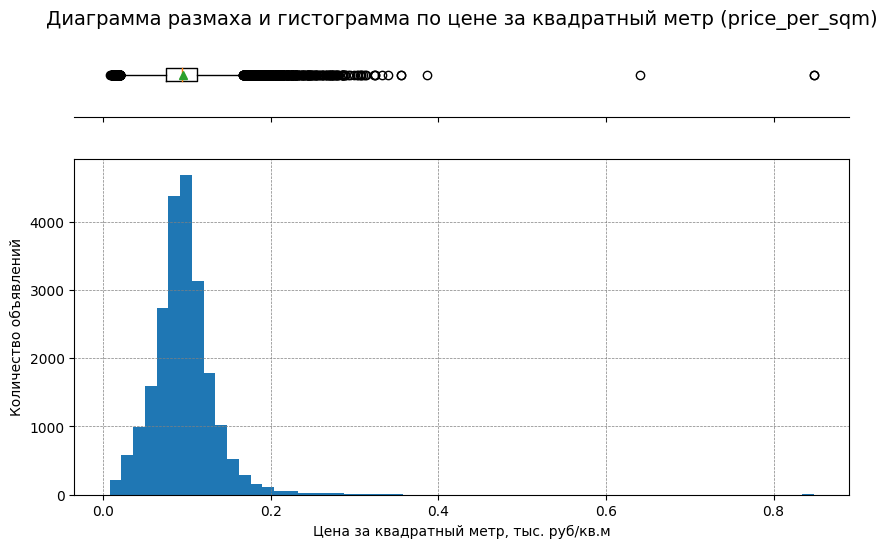

In [94]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(10, 6),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.2, .8)})
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[1].grid(color='gray', linewidth = 0.5, linestyle = '--') 
ax[0].set_title('Диаграмма размаха и гистограмма по цене за квадратный метр (price_per_sqm)', fontsize=14)
ax[1].set_xlabel('Цена за квадратный метр, тыс. руб/кв.м')
ax[1].set_ylabel('Количество объявлений')
# Построим сами диаграммы
ax[0].boxplot(good_data['price_per_sqm'], vert=False, showmeans=True)
ax[1].hist(good_data['price_per_sqm'], bins=60)
plt.show()

Распределение нормальное с пиком в районе 90-100 тыс руб/кв. м

### День недели

In [95]:
good_data['day_of_week'] = good_data['first_day_exposition'].dt.weekday

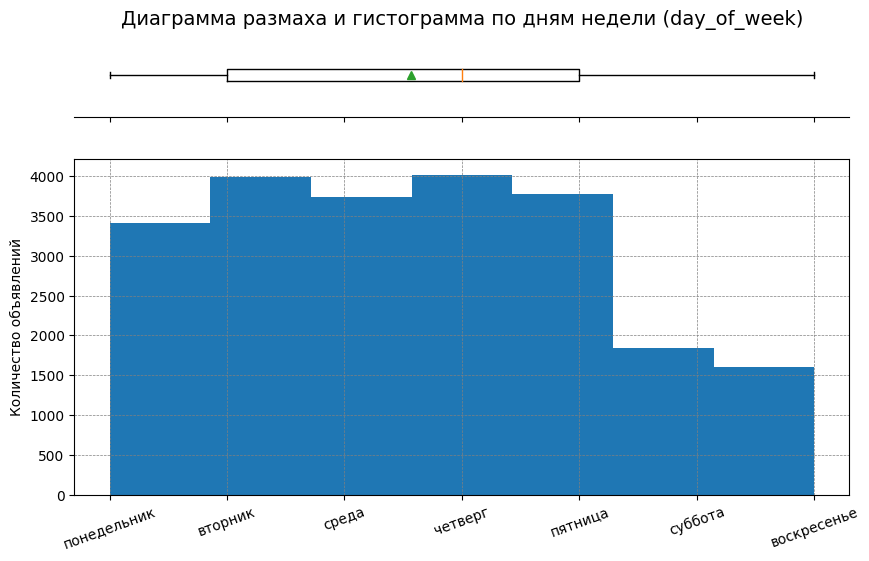

In [96]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(10, 6),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.2, .8)})
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[1].grid(color='gray', linewidth = 0.5, linestyle = '--') 
ax[0].set_title('Диаграмма размаха и гистограмма по дням недели (day_of_week)', fontsize=14)
ax[1].set_xticks(range(0,7,1))
ax[1].set_xticklabels(['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье'], rotation = 20)
#ax[1].set_xlabel('День недели')
ax[1].set_ylabel('Количество объявлений')
# Построим сами диаграммы
ax[0].boxplot(good_data['day_of_week'], vert=False, showmeans=True)
ax[1].hist(good_data['day_of_week'], bins=7)
plt.show()

В выходные объявления публикуются в два раза реже, чем в будние дни. В будние дни активность публикации максимальна в период со вторника по четверг.

### Месяц публикации

In [97]:
good_data['month'] = good_data['first_day_exposition'].dt.month

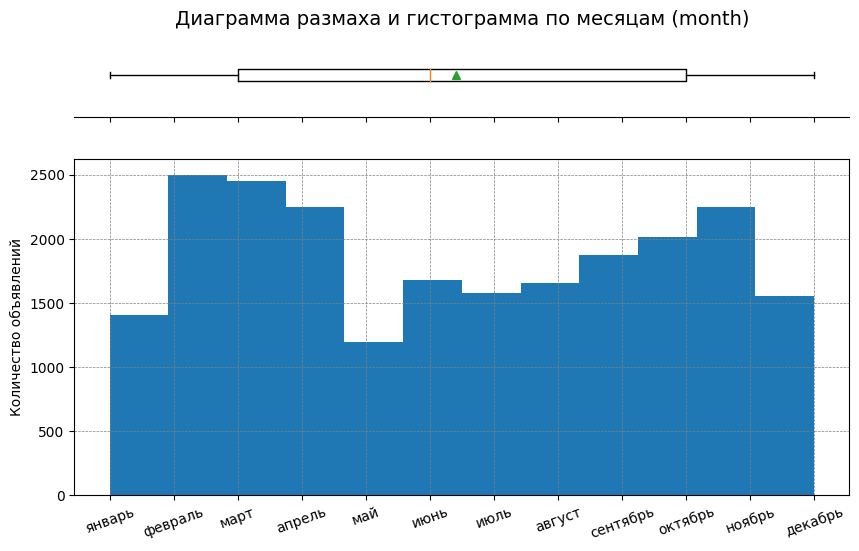

In [98]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(10, 6),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.2, .8)})
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[1].grid(color='gray', linewidth = 0.5, linestyle = '--') 
ax[0].set_title('Диаграмма размаха и гистограмма по месяцам (month)', fontsize=14)
ax[1].set_xticks(range(1,13,1))
ax[1].set_xticklabels(['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', \
                      'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь'], rotation = 20)
#ax[1].set_xlabel('Месяц')
ax[1].set_ylabel('Количество объявлений')
# Построим сами диаграммы
ax[0].boxplot(good_data['month'], vert=False, showmeans=True)
ax[1].hist(good_data['month'], bins=12)
plt.show()

В новогодний период (декабрь и январь), а также в сезон отпусков (май-август) активность ниже, чем в остальные месяцы. Пик активности - с февраля по апрель.

### Год публикации

In [99]:
good_data['year'] = good_data['first_day_exposition'].dt.year

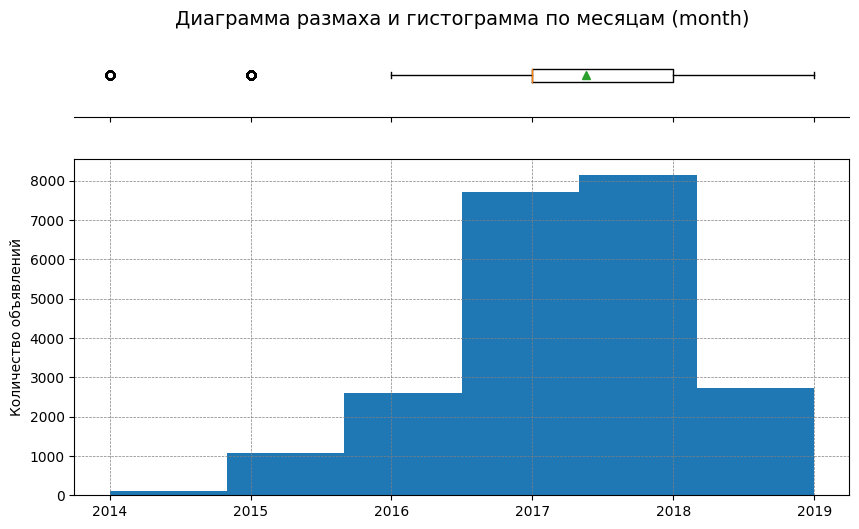

In [100]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(10, 6),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.2, .8)})
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[1].grid(color='gray', linewidth = 0.5, linestyle = '--') 
ax[0].set_title('Диаграмма размаха и гистограмма по месяцам (month)', fontsize=14)
ax[1].set_xticks(range(2014, 2020, 1))
ax[1].set_xticklabels(['2014', '2015', '2016', '2017', '2018', '2019'])
#ax[1].set_xlabel('Год')
ax[1].set_ylabel('Количество объявлений')
# Построим сами диаграммы
ax[0].boxplot(good_data['year'], vert=False, showmeans=True)
ax[1].hist(good_data['year'], bins=6)
plt.show()

В 2014 и в 2019 не весь год представлен в таблице. Видно, что за период 2014-2016 сервис набирал популярность у пользователей, размещающих объявления, а начиная с 2017 количество объявлений год от года меняется мало.

### Тип этажа квартиры

In [101]:
# Заполним столбец с типом этажа
first_floors = good_data[good_data['floor'] == 1]
last_floors = good_data[good_data['floor'] == good_data['floors_total']]
good_data.loc[good_data.index.isin(first_floors.index), 'floor_type'] = 'первый'
good_data.loc[good_data.index.isin(last_floors.index), 'floor_type'] = 'последний'
good_data['floor_type'] = good_data['floor_type'].fillna('другой')
good_data['floor_type'].value_counts()

floor_type
другой       16459
последний     3138
первый        2795
Name: count, dtype: int64

Первый и последний этаж указан примерно в одинаковом количестве объявлений.

### Расстояние до центра города в км

In [102]:
def km_to_center(dist):
    for i in range(0,100,1):
        if i*1000 <= dist <= (i+1)*1000:
            return int(i+1)

In [103]:
good_data['km_to_center'] = good_data['cityCenters_nearest'].apply(km_to_center)

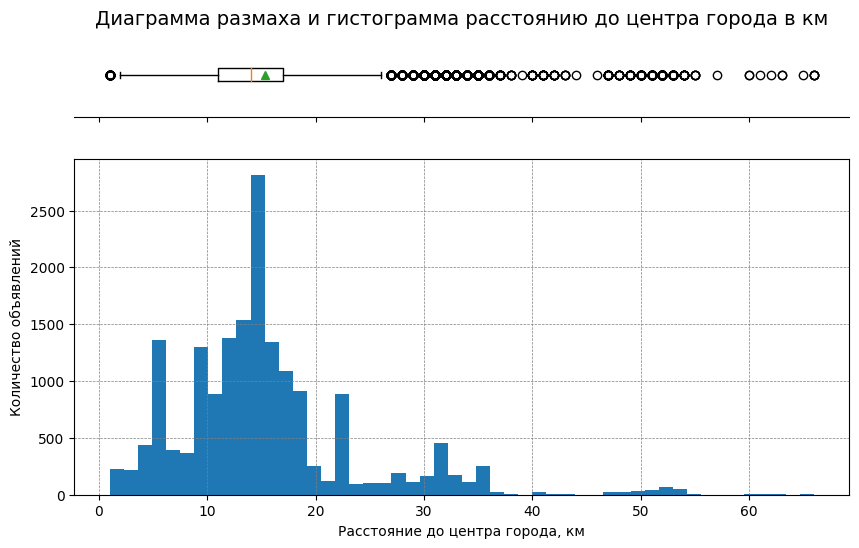

In [104]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(10, 6),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.2, .8)})
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(axis='y', left=False, labelleft=False)
ax[1].grid(color='gray', linewidth = 0.5, linestyle = '--') 
ax[0].set_title('Диаграмма размаха и гистограмма расстоянию до центра города в км', fontsize=14)
ax[1].set_xlabel('Расстояние до центра города, км')
ax[1].set_ylabel('Количество объявлений')
# Построим сами диаграммы
ax[0].boxplot(good_data[~(good_data['km_to_center'].isna())]['km_to_center'], vert=False, showmeans=True)
ax[1].hist(good_data['km_to_center'], bins=50)
plt.show()

Медиана и среднее значение лежат в диапазоне 13-16 км, но имеются локальные пики для значений 22, 31, 52 км, что говорит о том, что на указанном расстоянии имеются крупные пригороды Санкт Петербурга.

## Исследовательский анализ данных

### Срок продажи квартиры

In [105]:
good_data['days_exposition'].describe()

count       19471.0
mean     177.892199
std      216.201484
min             1.0
25%            45.0
50%            94.0
75%           226.5
max          1580.0
Name: days_exposition, dtype: Float64

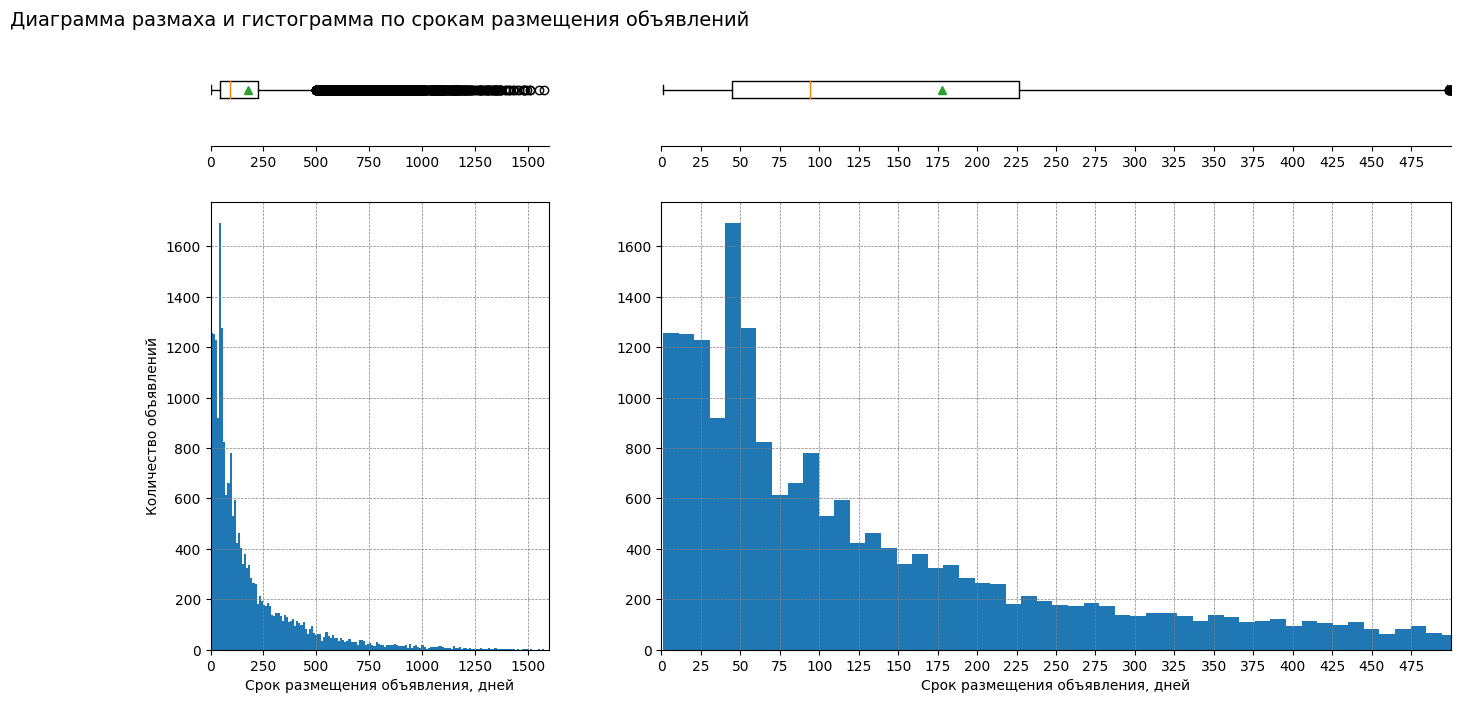

In [106]:
# Построим диаграмму размаха (boxplot) и гистограмму
# Поскольку срок продажи в большинстве объявлений не превышает 220 дней, а максимальный срок составляет 1580 дней,
# то построим диаграммы в разных масштабах:
# слева будут диаграммы на весь диапазон, а справа - с ограничением максимального срока на уровне 500  дней.
# Настроим внешний вид области построения
fig, ax = plt.subplots(ncols=2, nrows=2,
                       figsize=(16, 8),
                       sharex=False,
                       gridspec_kw={'height_ratios': (.2, .8), 'width_ratios': (.3, .7)})
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].spines['left'].set_visible(False)
ax[0, 0].tick_params(axis='y', left=False, labelleft=False)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].spines['left'].set_visible(False)
ax[0, 1].tick_params(axis='y', left=False, labelleft=False)
ax[1, 0].grid(color='gray', linewidth = 0.5, linestyle = '--')
ax[1, 1].grid(color='gray', linewidth = 0.5, linestyle = '--')
ax[0,0].sharex(ax[1, 0])
ax[0,1].sharex(ax[1, 1])
ax[1, 0].set_xticks(range(0, 1600, 250))
ax[1, 0].set_xlim(0,1600)
ax[1, 1].set_xticks(range(0, 500, 25))
ax[1, 1].set_xlim(0,500)
ax[0,0].set_title('Диаграмма размаха и гистограмма по срокам размещения объявлений', fontsize=14)
ax[1,0].set_xlabel('Срок размещения объявления, дней')
ax[1,0].set_ylabel('Количество объявлений')
ax[1,1].set_xlabel('Срок размещения объявления, дней')
# Построим сами диаграммы
ax[0,0].boxplot(good_data[~(good_data['days_exposition'].isna())]['days_exposition'], vert=False, showmeans=True)
ax[0,1].boxplot(good_data[~(good_data['days_exposition'].isna())]['days_exposition'], vert=False, showmeans=True)
ax[1,0].hist(data['days_exposition'], bins=160)
ax[1,1].hist(data['days_exposition'], bins=160)
plt.show()

Продажа квартиры происходит чаще всего в течение ~50 дней. Медианное значение срока размещения объявления ~90 дней. Среднее значение ~175 дней. Отличие среднего от медианы объясняется тем, что есть объявления, которые опубликованы годами. Верхняя граница нормального размаха ~ 500 дней. Если продажа заняла менее месяца - это быстрая продажа. Если продажа занимает более 500 дней - это необычно долго.

### Влияние параметров на стоимость

Определим, какие факторы больше всего влияют на общую (полную) стоимость объекта. Построим графики, которые покажут зависимость цены от указанных ниже параметров:
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год).

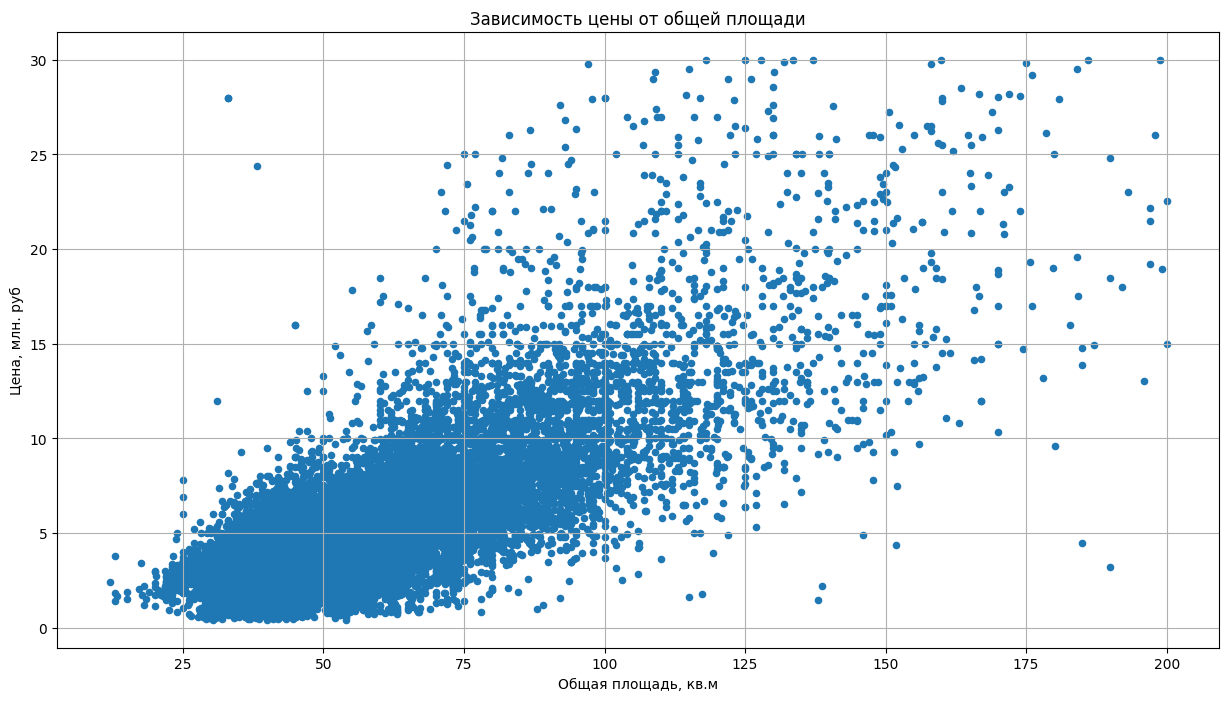

In [107]:
# Построим диграмму рассеяния зависимости цены от общей площади
good_data.plot(x='total_area', y='last_price', kind='scatter',
               figsize=(15,8),
               title='Зависимость цены от общей площади',
               grid=True,
               xlabel='Общая площадь, кв.м',
               ylabel='Цена, млн. руб')
plt.show()

In [108]:
# Рассчитаем коэффициент Пирсона
good_data['last_price'].corr(good_data['total_area'])

0.768786355149054

Цена зависит от площади. Коэффициент корреляции говорит о том, что линейность зависимости существенная.

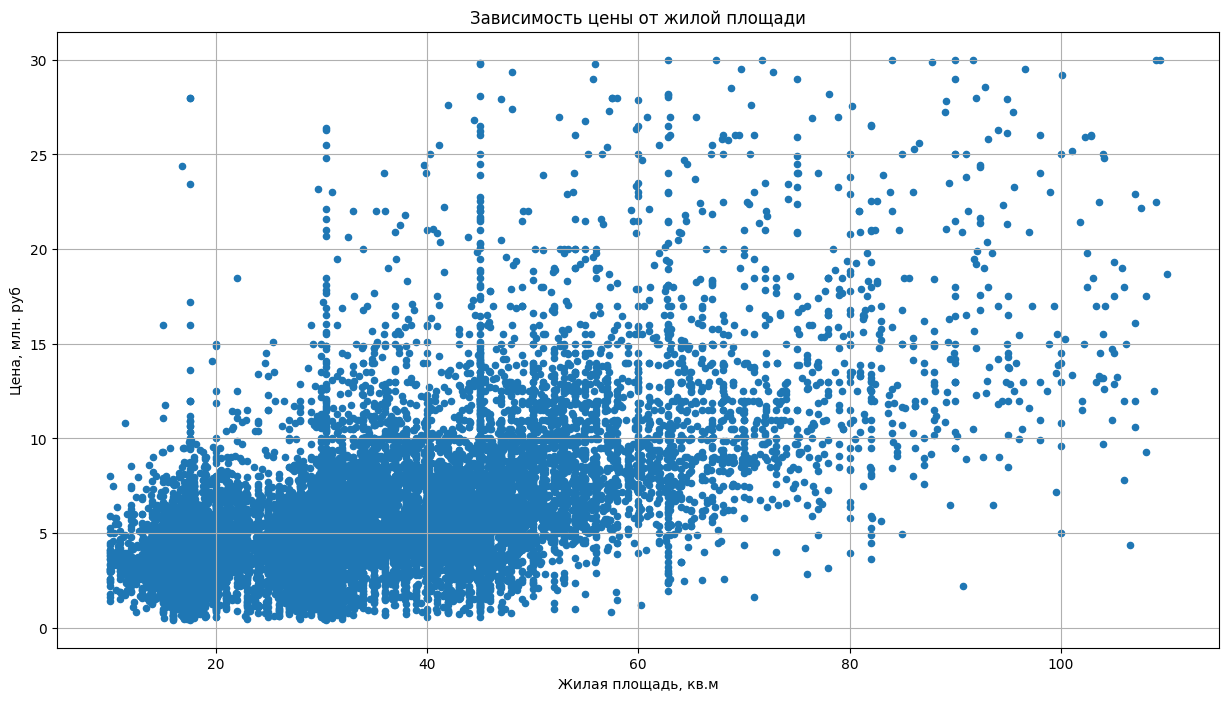

In [109]:
# Построим диграмму рассеяния зависимости цены от жилой площади
good_data.plot(x='living_area', y='last_price', kind='scatter',
               figsize=(15,8),
               title='Зависимость цены от жилой площади',
               grid=True,
               xlabel='Жилая площадь, кв.м',
               ylabel='Цена, млн. руб')
plt.show()

In [110]:
# Рассчитаем коэффициент Пирсона
good_data['last_price'].corr(good_data['living_area'])

0.6339105879515903

Сила зависимости цены от жилой площади ниже, чем от общей площади

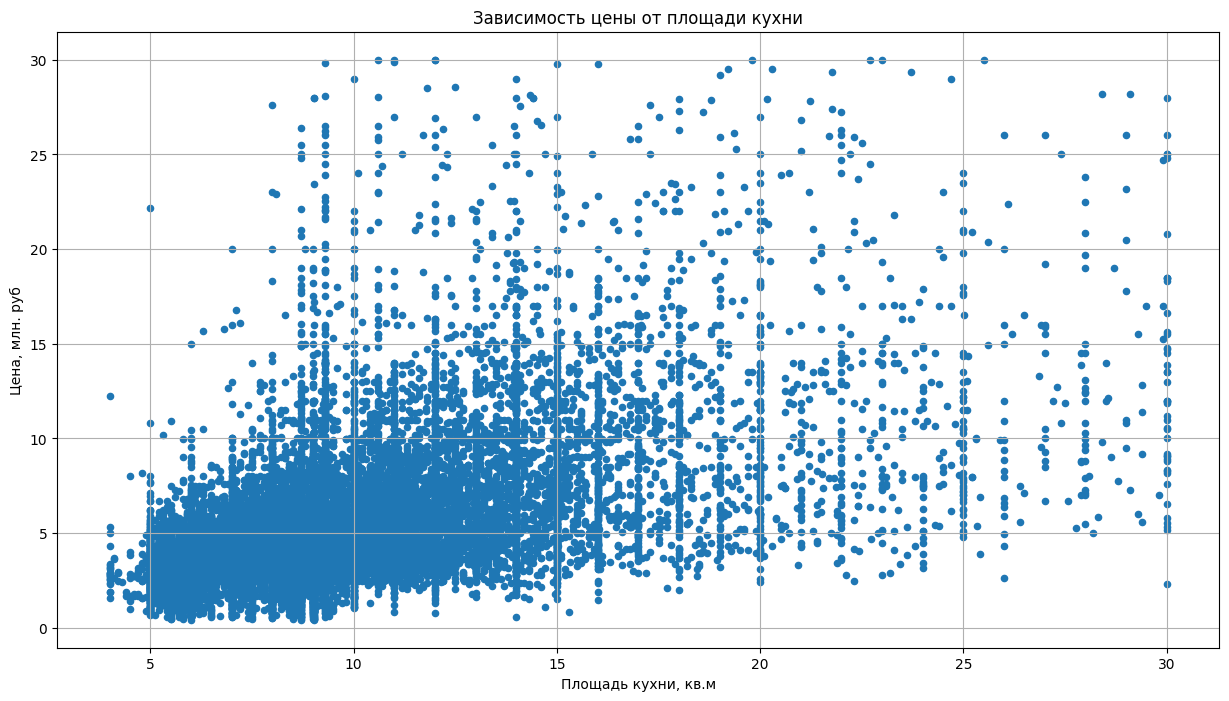

In [111]:
# Построим диграмму рассеяния зависимости цены от площади кухни
good_data.plot(x='kitchen_area', y='last_price', kind='scatter',
               figsize=(15,8),
               title='Зависимость цены от площади кухни',
               grid=True,
               xlabel='Площадь кухни, кв.м',
               ylabel='Цена, млн. руб')
plt.show()

In [112]:
# Рассчитаем коэффициент Пирсона
good_data['last_price'].corr(good_data['kitchen_area'])

0.533189110578126

Зависимость цены от площади кухни выражена наименее ярко из всех параметров, связанных с площадью.

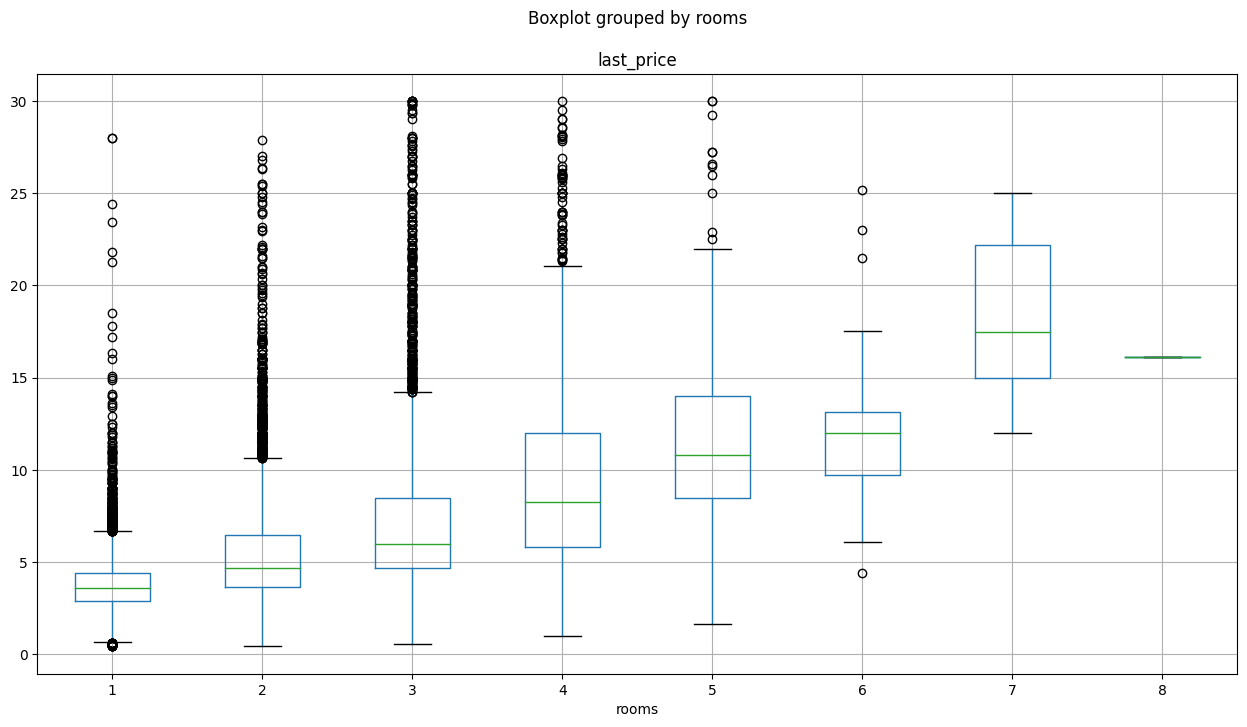

In [113]:
# Построим диграмму размаха для разного количества комнат
good_data.boxplot(by='rooms', column='last_price', figsize=(15,8))
plt.show()

In [114]:
# Рассчитаем коэффициент Пирсона
good_data['last_price'].corr(good_data['rooms'])

0.47528327503169876

По медианным значениям цены видно, что с ростом количества комнат растёт и цена, не считая 8-комнатной, но это уникальное явление. При этом коэффициент Пирсона невелик. По всей видимости, зависимость не линейная.

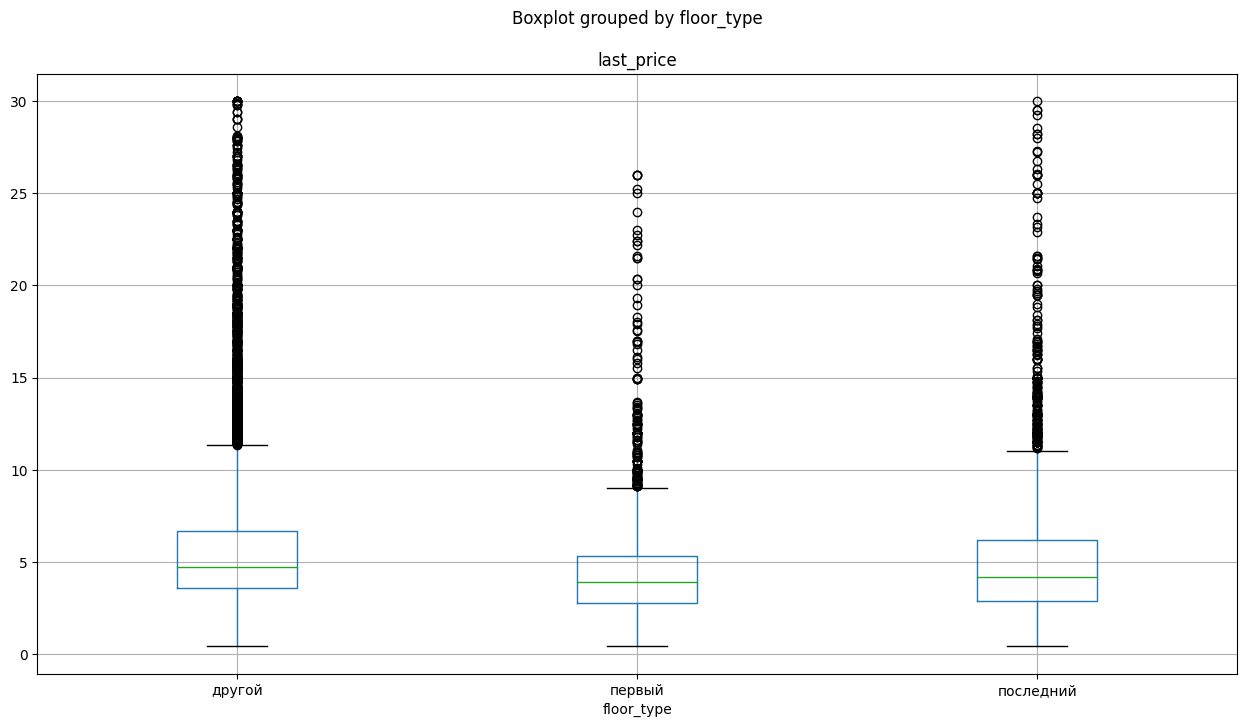

In [115]:
# Построим диграмму рассеяния зависимости цены от типа этажа
good_data.boxplot(by='floor_type', column='last_price', figsize=(15,8))
plt.show()

Цена первых этажей минимальная. Цены объектов, расположенных на последнем этаже также ниже, чем все остальные этажи, но выше, чем цена первого этажа.

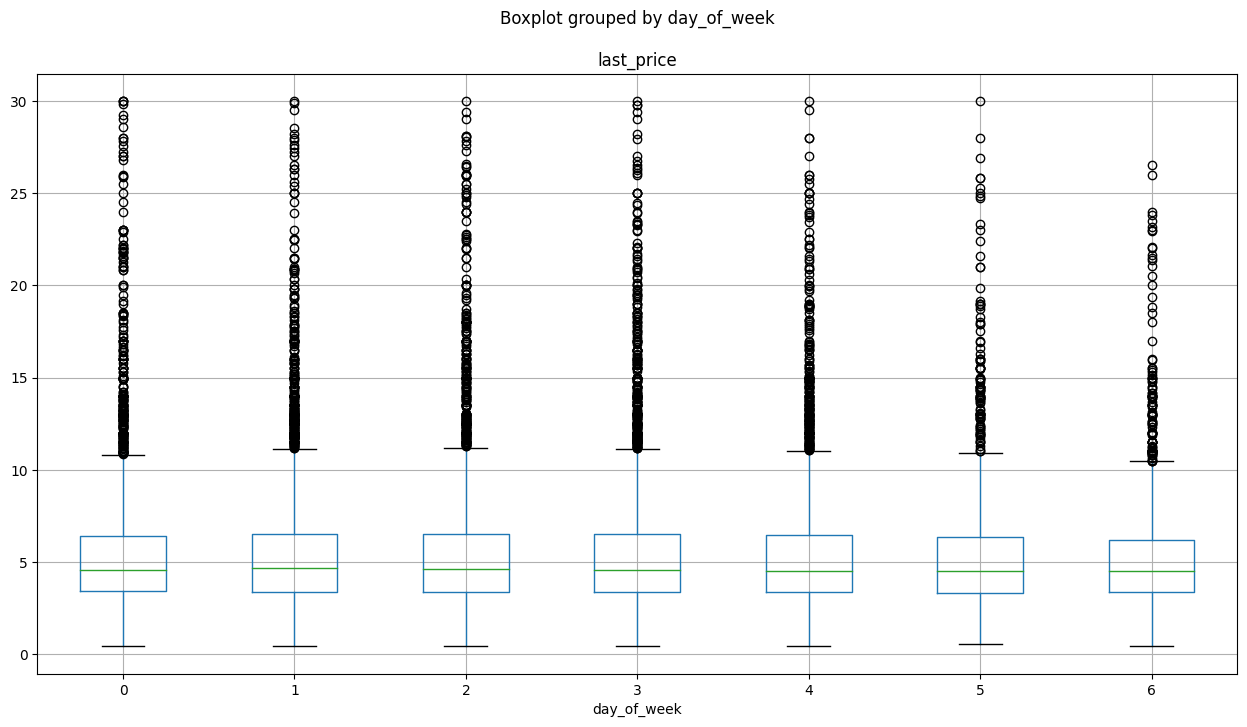

In [116]:
# Построим диграмму рассеяния зависимости цены от дня недели
good_data.boxplot(by='day_of_week', column='last_price', figsize=(15,8))
plt.show()

Цена не зависит от дня недели, в котором размещено объявление

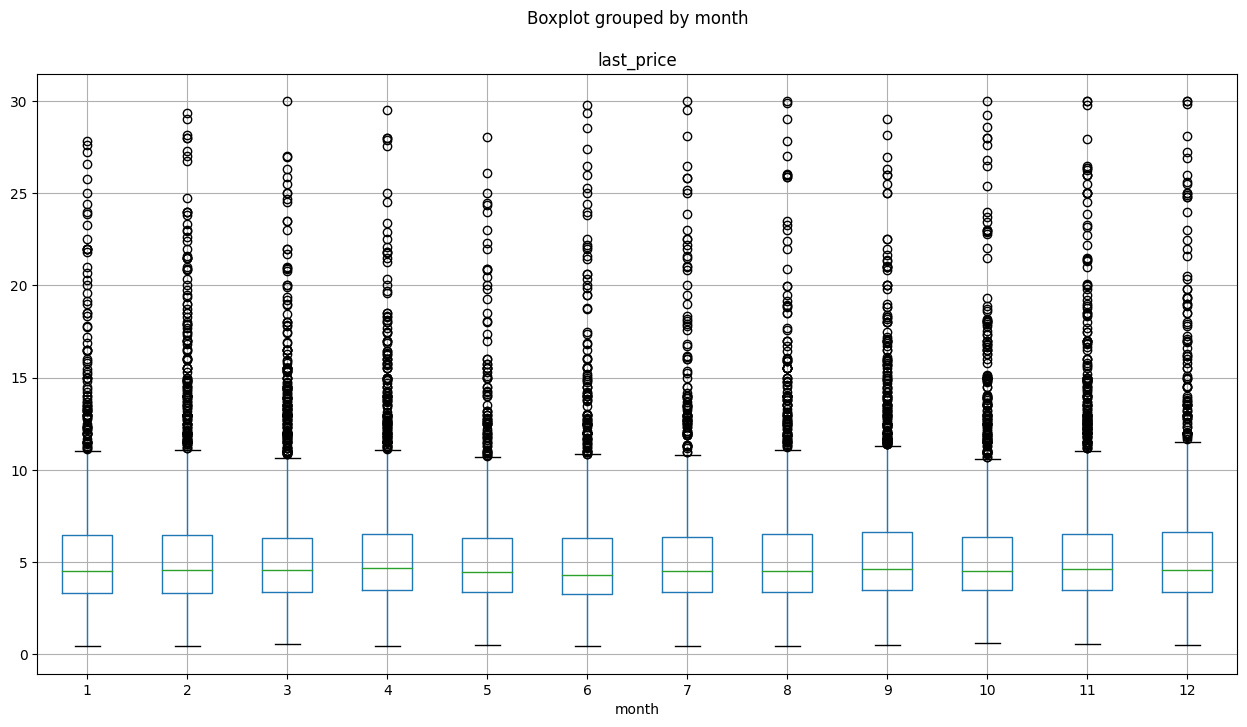

In [117]:
# Построим диграмму рассеяния зависимости цены от месяца
good_data.boxplot(by='month', column='last_price', figsize=(15,8))
plt.show()

Цена не зависит от месяца, в котором размещено объявление

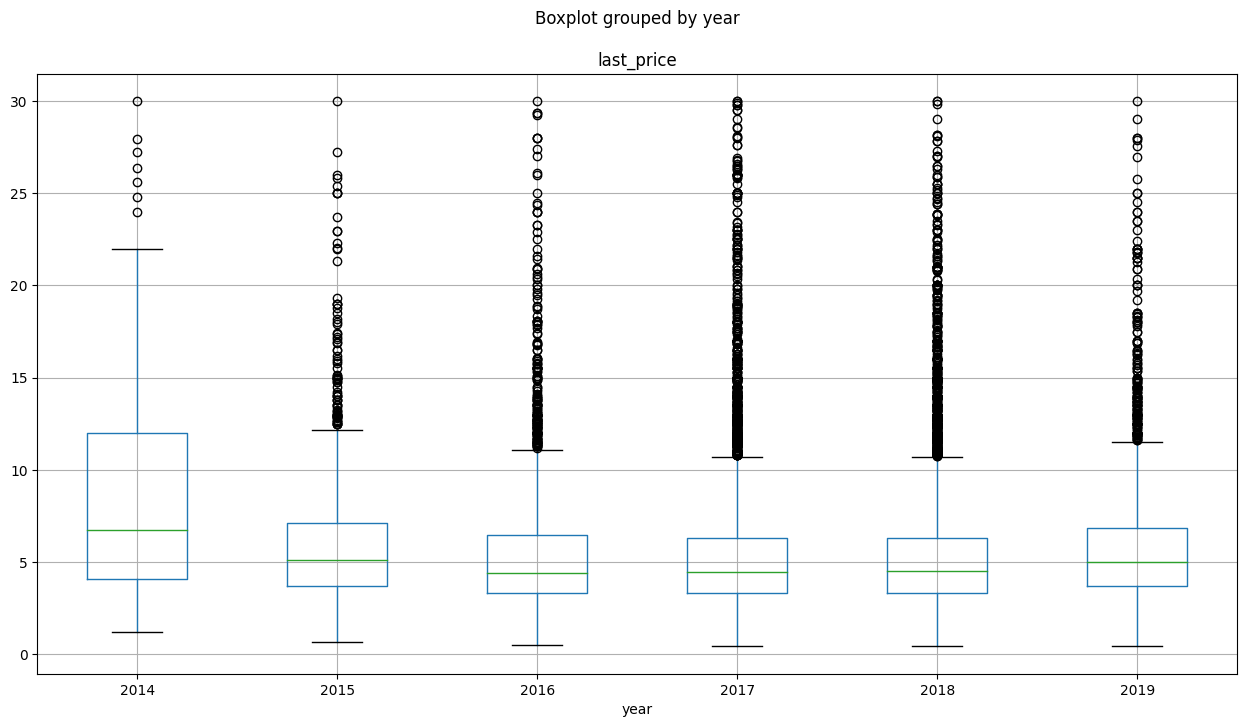

In [118]:
# Построим диграмму рассеяния зависимости цены от года
good_data.boxplot(by='year', column='last_price', figsize=(15,8))
plt.show()

Цена год от года меняется. Зависимость не линейная, т.к. коэффициент практически равен нулю.

Наибольшая зависимость цены наблюдается от общей площади, количества комнат и типа этажа.

### Средняя стоимость квадратного метра

In [119]:
# Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
top10_localities = (good_data.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['count', 'mean'])
.sort_values(by=('count', 'price_per_sqm'), ascending=False)
 .head(10))
top10_localities.columns=['count', 'price_per_sqm']
display(top10_localities)

,count,price_per_sqm
locality_name,,
Санкт-Петербург,14649,0.109705
посёлок Мурино,523,0.084947
посёлок Шушары,432,0.078331
Всеволожск,388,0.068538
Пушкин,354,0.102532
Колпино,337,0.075333
посёлок Парголово,322,0.090448
Гатчина,305,0.068730
деревня Кудрово,282,0.092369


In [120]:
# Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.
print('Минимальная цена')
display(top10_localities[top10_localities['price_per_sqm'] == top10_localities['price_per_sqm'].min()])
print('Максимальная цена')
display(top10_localities[top10_localities['price_per_sqm'] == top10_localities['price_per_sqm'].max()])

Минимальная цена


,count,price_per_sqm
locality_name,,
Выборг,228,0.057935


Максимальная цена


,count,price_per_sqm
locality_name,,
Санкт-Петербург,14649,0.109705


### Средняя цена при изменении расстояния от центра Санкт-Петербурга

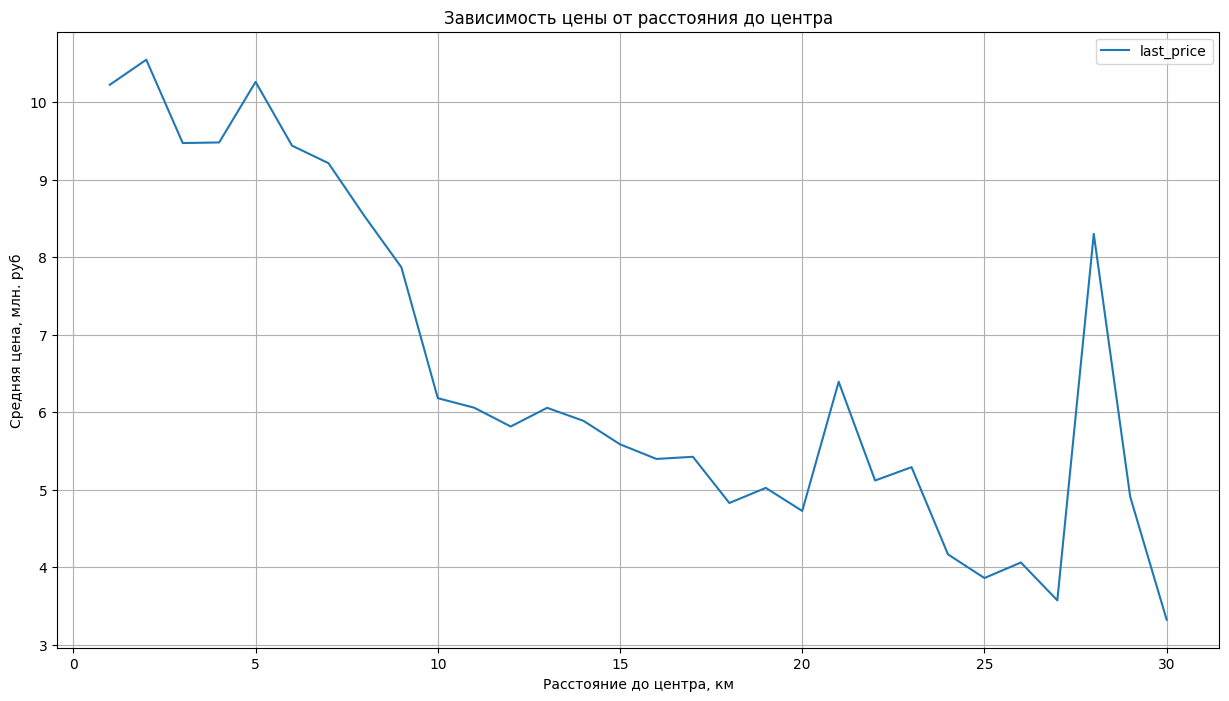

In [121]:
# Вычислим среднюю цену каждого километра при изменении расстояния от центра Санкт-Петербурга
km_prices = good_data[good_data['locality_name'] == 'Санкт-Петербург'].pivot_table(index='km_to_center', values='last_price', aggfunc='mean')
km_prices = km_prices.reset_index()
km_prices.plot(x='km_to_center', y='last_price', kind='line', figsize=(15,8),
                title='Зависимость цены от расстояния до центра',
                grid=True,
                xlabel='Расстояние до центра, км',
                ylabel='Средняя цена, млн. руб')
plt.show()

In [122]:
# Вычислим коэффициент корреляции
km_prices['km_to_center'].corr(km_prices['last_price'])

-0.8351621292527506

Явно заметна обратная зависимость до расстояния 20 км, что подтверждается и сильным коэффициентом Пирсона.
Имеются пики на расстояниях 21 км и 28 км, вероятно, это связано с тем, что на окраинах строятся новые жилые комплексы с высокой стоимостью квартир.

## Общий вывод

В ходе работы были выявлены и устранены недостатки в данных: устранены дубликаты, отброшены аномалии, заполнены пропуски.
В ходе исследования обработанныйх данных удалось выявить:
- продажа квартиры происходит чаще всего в течение ~50 дней, при этом если продажа выполнена менее, чем за месяц, её можно считать быстрой, а если объявление висит более 500 дней - это уже необычно длительный срок,
- наибольшая зависимость цены наблюдается от общей площади, количества комнат и типа этажа,
- из топ-10 населённых пунктов по количеству объявлений самая высокая средняя цена за кв. м в Санкт-Петербурге, а самая низкая - в Выборге,
- зависимость цены от расстояния до центра Санкт-Петербурга выражена на расстояниях до 10 км, далее зависимости практически нет 